# StatCan Data on International and Domestic PSI student enrolment, 2011-2021

## imports and setup

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Reading in the CSV
df = pd.read_csv("/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/statcan-FT-canadian-09-23.csv", encoding='utf-8')

In [78]:
df.head(5)

REF_DATE     GEO           DGUID         Field of study  \
0  2009/2010  Canada  2021A000011124  Total, field of study   
1  2010/2011  Canada  2021A000011124  Total, field of study   
2  2011/2012  Canada  2021A000011124  Total, field of study   
3  2012/2013  Canada  2021A000011124  Total, field of study   
4  2013/2014  Canada  2021A000011124  Total, field of study   

          Program type         Credential type          Institution type  \
0  Total, program type  Total, credential type  Total, institution type    
1  Total, program type  Total, credential type  Total, institution type    
2  Total, program type  Total, credential type  Total, institution type    
3  Total, program type  Total, credential type  Total, institution type    
4  Total, program type  Total, credential type  Total, institution type    

  Registration status Status of student in Canada         Gender  ... UOM_ID  \
0   Full-time student           Canadian students  Total, gender  ...    223   
1   Full-time student           Canadian students  Total, gender  ...    223   
2   Full-time student           Canadian students  Total, gender  ...    223   
3   Full-time student           Canadian students  Total, gender  ...    223   
4   Full-time student           Canadian students  Total, gender  ...    223   

   SCALAR_FACTOR SCALAR_ID       VECTOR       COORDINATE    VALUE  STATUS  \
0          units         0  v1607973747  1.1.1.1.1.2.2.1  1295745     NaN   
1          units         0  v1607973747  1.1.1.1.1.2.2.1  1333188     NaN   
2          units         0  v1607973747  1.1.1.1.1.2.2.1  1353324     NaN   
3          units         0  v1607973747  1.1.1.1.1.2.2.1  1366443     NaN   
4          units         0  v1607973747  1.1.1.1.1.2.2.1  1378959     NaN   

   SYMBOL  TERMINATED  DECIMALS  
0     NaN         NaN         0  
1     NaN         NaN         0  
2     NaN         NaN         0  
3     NaN         NaN         0  
4     NaN         NaN         0  

[5 rows x 21 columns]

Lots of trash columns we can remove from the above. I pulled from StatCan and as this notebook is examining international / domestic splits in particular, many columns simply are total of program type, credential type etc...

Let's remove them

In [79]:
print(df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Field of study', 'Program type',
       'Credential type', 'Institution type', 'Registration status',
       'Status of student in Canada', 'Gender', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [80]:
df.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

Cleaned off most columns, keeping Full-time Canadian to show the student type being examined

In [81]:
# rename columns
df.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [82]:
df["FY Start"] = df["FY Start"].apply(lambda x: int(x[:4]))

In [83]:
df

FY Start                  School/Locality Registration status  \
0         2009                           Canada   Full-time student   
1         2010                           Canada   Full-time student   
2         2011                           Canada   Full-time student   
3         2012                           Canada   Full-time student   
4         2013                           Canada   Full-time student   
...        ...                              ...                 ...   
3483      2018  Nunavut Arctic College, Nunavut   Full-time student   
3484      2019  Nunavut Arctic College, Nunavut   Full-time student   
3485      2020  Nunavut Arctic College, Nunavut   Full-time student   
3486      2021  Nunavut Arctic College, Nunavut   Full-time student   
3487      2022  Nunavut Arctic College, Nunavut   Full-time student   

                 Status  Enrolment  
0     Canadian students    1295745  
1     Canadian students    1333188  
2     Canadian students    1353324  
3     Canadian students    1366443  
4     Canadian students    1378959  
...                 ...        ...  
3483  Canadian students        693  
3484  Canadian students        750  
3485  Canadian students        843  
3486  Canadian students        873  
3487  Canadian students        783  

[3488 rows x 5 columns]

### Split up the colleges/universities from Canada and the provincial totals

In [84]:
# List of provinces and territories in Canada
canadian_provinces_territories = [
    "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan",
    "Northwest Territories", "Nunavut", "Yukon", "Canada"
]

# Convert the list to a set for fast exact matching
province_set = set(canadian_provinces_territories)

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df = df[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df = df[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df['Institution Name'] = non_canada_df['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df = non_canada_df.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# save the DataFrames to CSVs if we want
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)


Number of rows in canada_df: 196
Number of rows in colleges_universities_df: 3292


In [85]:
colleges_universities_df

FY Start                                    School/Locality  \
28        2009  Memorial University of Newfoundland, Newfoundl...   
29        2010  Memorial University of Newfoundland, Newfoundl...   
30        2011  Memorial University of Newfoundland, Newfoundl...   
31        2012  Memorial University of Newfoundland, Newfoundl...   
32        2013  Memorial University of Newfoundland, Newfoundl...   
...        ...                                                ...   
3483      2018                    Nunavut Arctic College, Nunavut   
3484      2019                    Nunavut Arctic College, Nunavut   
3485      2020                    Nunavut Arctic College, Nunavut   
3486      2021                    Nunavut Arctic College, Nunavut   
3487      2022                    Nunavut Arctic College, Nunavut   

     Registration status             Status  Enrolment  
28     Full-time student  Canadian students      14298  
29     Full-time student  Canadian students      14196  
30     Full-time student  Canadian students      14097  
31     Full-time student  Canadian students      13923  
32     Full-time student  Canadian students      13611  
...                  ...                ...        ...  
3483   Full-time student  Canadian students        693  
3484   Full-time student  Canadian students        750  
3485   Full-time student  Canadian students        843  
3486   Full-time student  Canadian students        873  
3487   Full-time student  Canadian students        783  

[3292 rows x 5 columns]

In [86]:
canada_df['School/Locality'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

## Canada-wide domestic enrolment from 2009 - 2022

In [168]:
canada_domestic = df[(df['Status'] == 'Canadian students') & (df['School/Locality'] == 'Canada')]

canada_domestic

FY Start School/Locality Registration status             Status  Enrolment
0       2009          Canada   Full-time student  Canadian students    1295745
1       2010          Canada   Full-time student  Canadian students    1333188
2       2011          Canada   Full-time student  Canadian students    1353324
3       2012          Canada   Full-time student  Canadian students    1366443
4       2013          Canada   Full-time student  Canadian students    1378959
5       2014          Canada   Full-time student  Canadian students    1366716
6       2015          Canada   Full-time student  Canadian students    1355496
7       2016          Canada   Full-time student  Canadian students    1360779
8       2017          Canada   Full-time student  Canadian students    1365513
9       2018          Canada   Full-time student  Canadian students    1361304
10      2019          Canada   Full-time student  Canadian students    1349823
11      2020          Canada   Full-time student  Canadian students    1357824
12      2021          Canada   Full-time student  Canadian students    1347282
13      2022          Canada   Full-time student  Canadian students    1320684

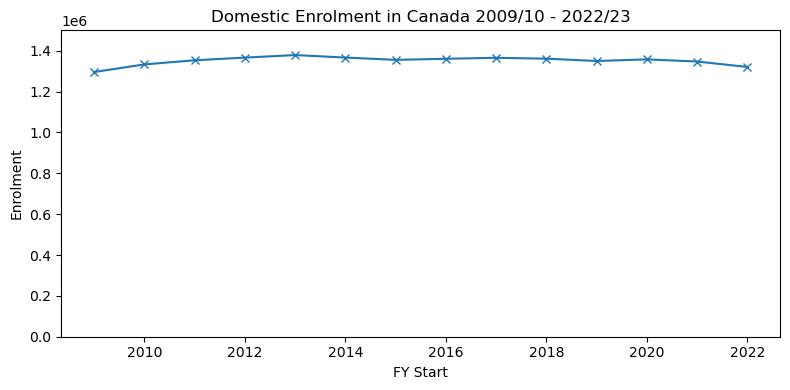

In [170]:
# plot Enrolment on y axis against FY start on x axis
plt.figure(figsize=(8, 4))
plt.plot(canada_domestic['FY Start'], canada_domestic['Enrolment'], marker='x')
plt.title('Domestic Enrolment in Canada 2009/10 - 2022/23')
plt.xlabel('FY Start')
plt.ylabel('Enrolment')
plt.ylim(0, 1500000)

plt.tight_layout()
plt.show()

## Visualising Canadian Domestic student enrolment 2009/10 - 2022/23 (initial, to be refined)

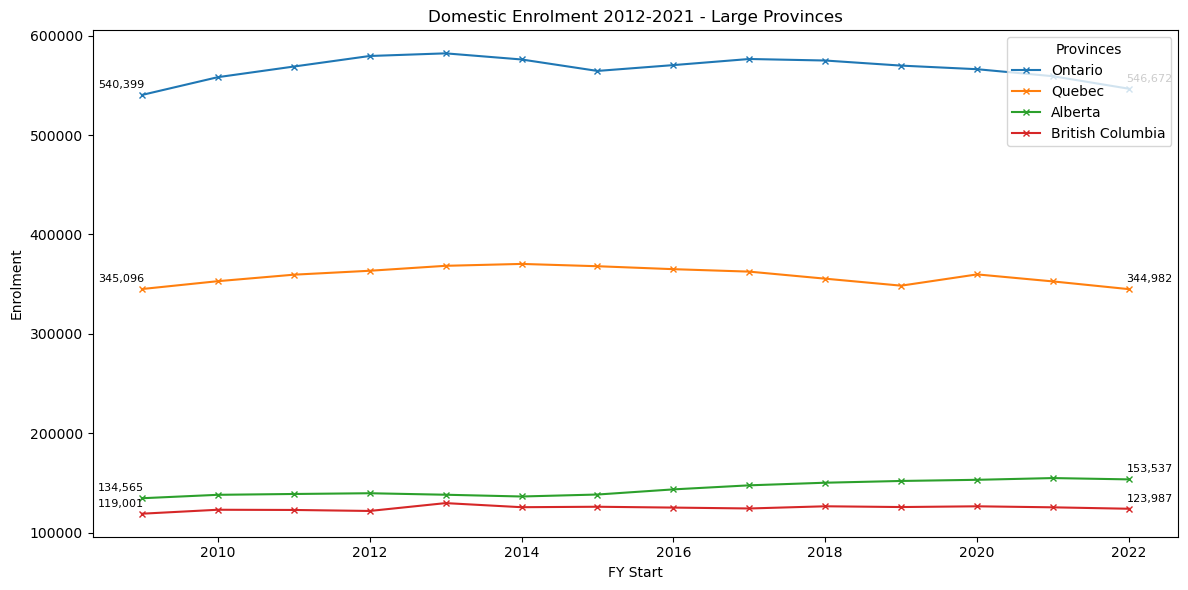

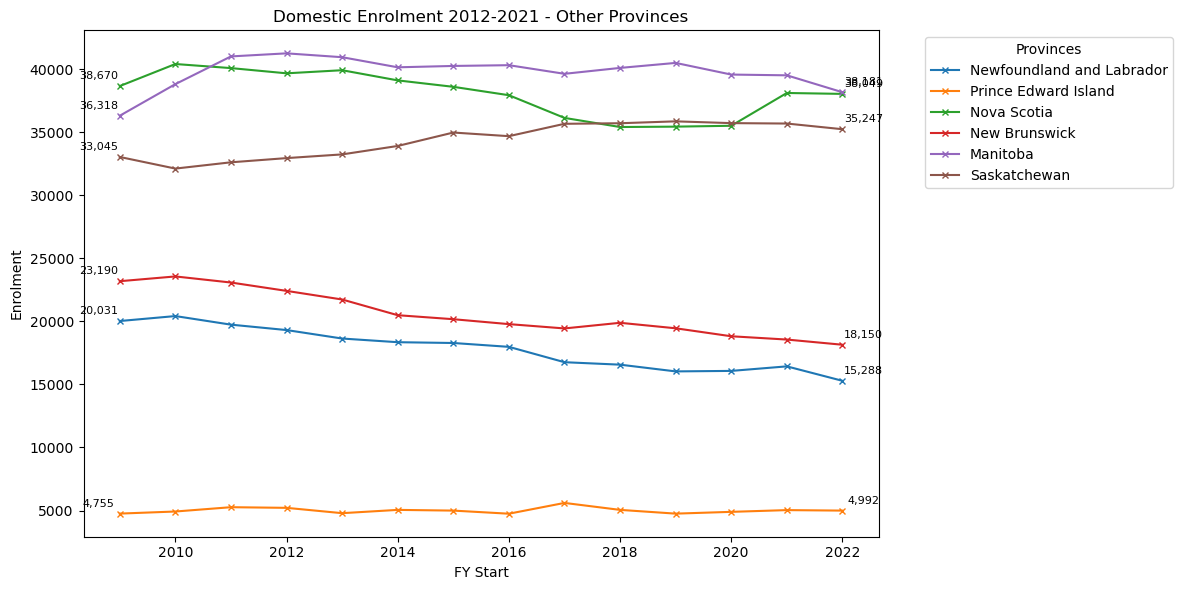

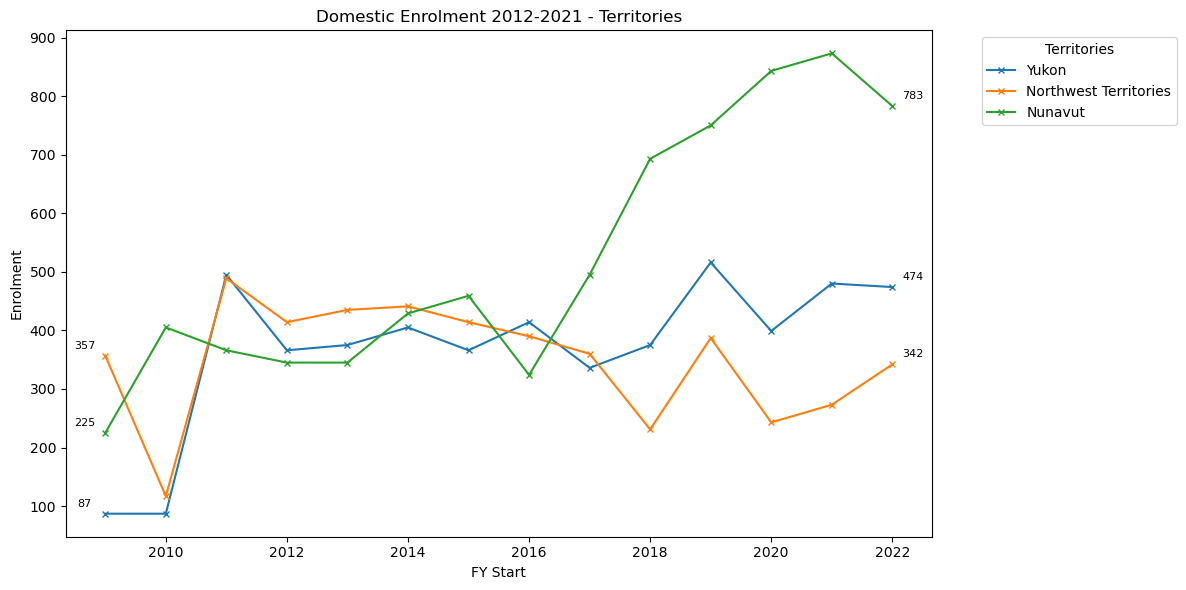

In [87]:
# Filter out rows where 'School/Locality' is "Canada" - the national figure will mess up the scale
provinces_df = canada_df[~canada_df['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Function to annotate the first and last y-values
def annotate_first_and_last_points(ax, x_data, y_data, label):
    if len(x_data) > 0 and len(y_data) > 0:
        # Annotate the first point (Fiscal Year 2011)
        ax.annotate(f'{y_data.iloc[0]:,.0f}', (x_data.iloc[0], y_data.iloc[0]), # iloc[0] is the first value
                    textcoords="offset points", xytext=(-15, 5), ha='center', fontsize=8)
        
        # Annotate the last point (Fiscal Year 2021)
        ax.annotate(f'{y_data.iloc[-1]:,.0f}', (x_data.iloc[-1], y_data.iloc[-1]), # iloc[-1] is the last value in the Series
                    textcoords="offset points", xytext=(15, 5), ha='center', fontsize=8)

# Create the first graph for large population provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )

    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], label=province)

ax.set_title('Domestic Enrolment 2012-2021 - Large Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('Domestic Enrolment 2012-2021 - Other Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
fig, ax = plt.subplots(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df[provinces_df['School/Locality'] == territory]
    ax.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, territory_data['FY Start'], territory_data['Enrolment'], territory)
ax.set_title('Domestic Enrolment 2012-2021 - Territories')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [88]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df[['School Name', 'Province/Territory']] = colleges_universities_df['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df.head())

    FY Start Registration status             Status  Enrolment  \
28      2009   Full-time student  Canadian students      14298   
29      2010   Full-time student  Canadian students      14196   
30      2011   Full-time student  Canadian students      14097   
31      2012   Full-time student  Canadian students      13923   
32      2013   Full-time student  Canadian students      13611   

                            School Name         Province/Territory  
28  Memorial University of Newfoundland  Newfoundland and Labrador  
29  Memorial University of Newfoundland  Newfoundland and Labrador  
30  Memorial University of Newfoundland  Newfoundland and Labrador  
31  Memorial University of Newfoundland  Newfoundland and Labrador  
32  Memorial University of Newfoundland  Newfoundland and Labrador  


In [89]:
colleges_universities_df

FY Start Registration status             Status  Enrolment  \
28        2009   Full-time student  Canadian students      14298   
29        2010   Full-time student  Canadian students      14196   
30        2011   Full-time student  Canadian students      14097   
31        2012   Full-time student  Canadian students      13923   
32        2013   Full-time student  Canadian students      13611   
...        ...                 ...                ...        ...   
3483      2018   Full-time student  Canadian students        693   
3484      2019   Full-time student  Canadian students        750   
3485      2020   Full-time student  Canadian students        843   
3486      2021   Full-time student  Canadian students        873   
3487      2022   Full-time student  Canadian students        783   

                              School Name         Province/Territory  
28    Memorial University of Newfoundland  Newfoundland and Labrador  
29    Memorial University of Newfoundland  Newfoundland and Labrador  
30    Memorial University of Newfoundland  Newfoundland and Labrador  
31    Memorial University of Newfoundland  Newfoundland and Labrador  
32    Memorial University of Newfoundland  Newfoundland and Labrador  
...                                   ...                        ...  
3483               Nunavut Arctic College                    Nunavut  
3484               Nunavut Arctic College                    Nunavut  
3485               Nunavut Arctic College                    Nunavut  
3486               Nunavut Arctic College                    Nunavut  
3487               Nunavut Arctic College                    Nunavut  

[3292 rows x 6 columns]

In [90]:
# light cleaing - remove "of Applied Arts & Technology"ArithmeticError# Remove "of Applied Arts and Technology" from all school names
colleges_universities_df['School Name'] = colleges_universities_df['School Name'].str.replace(
    " of Applied Arts and Technology", "", regex=False
)

colleges_universities_df['School Name'] = colleges_universities_df['School Name'].str.replace(
    " Institute of Technology and Advanced Learning", "", regex=False
)

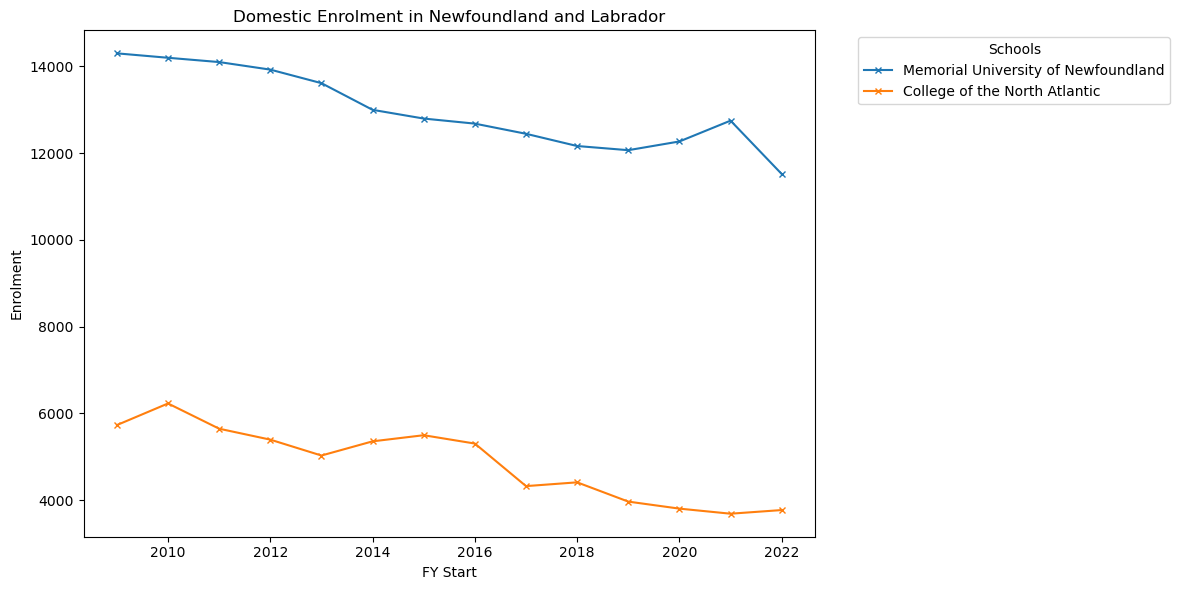

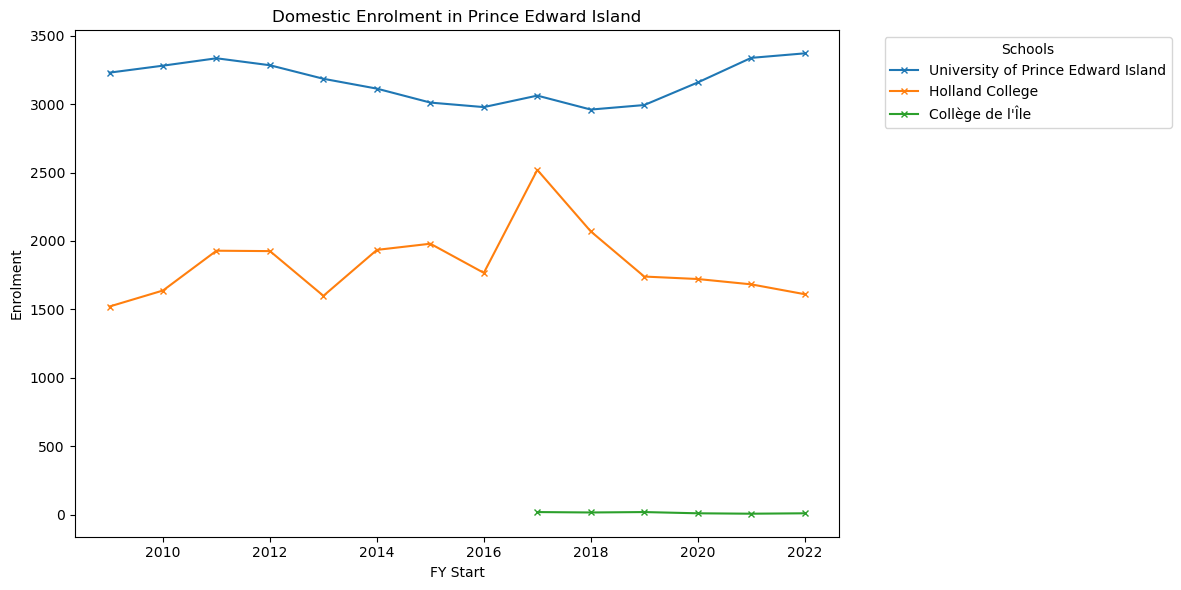

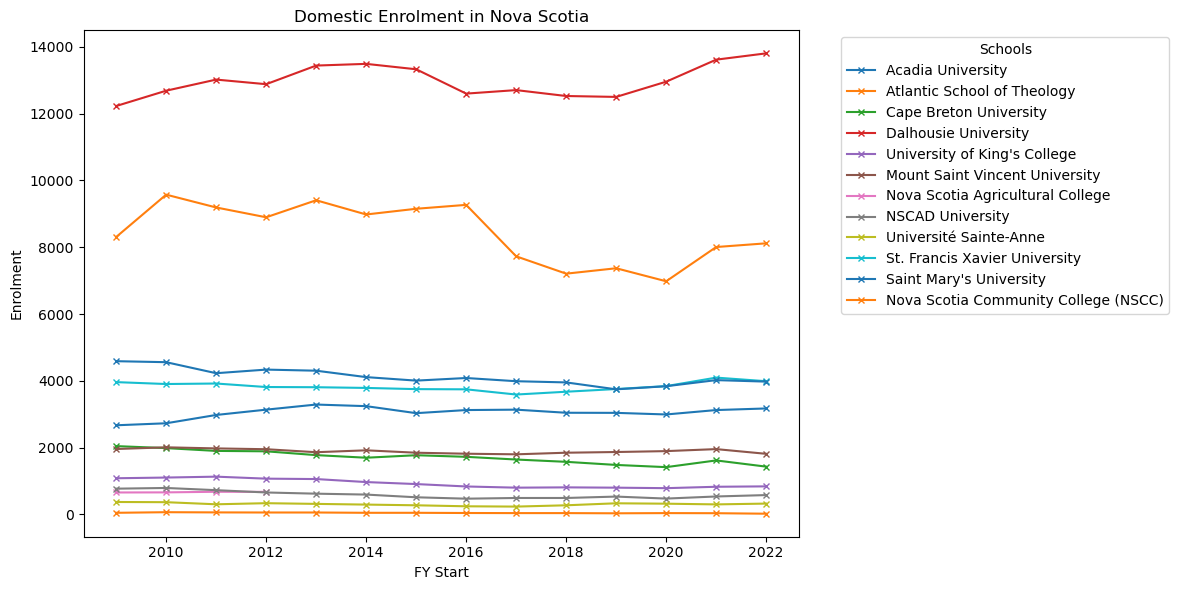

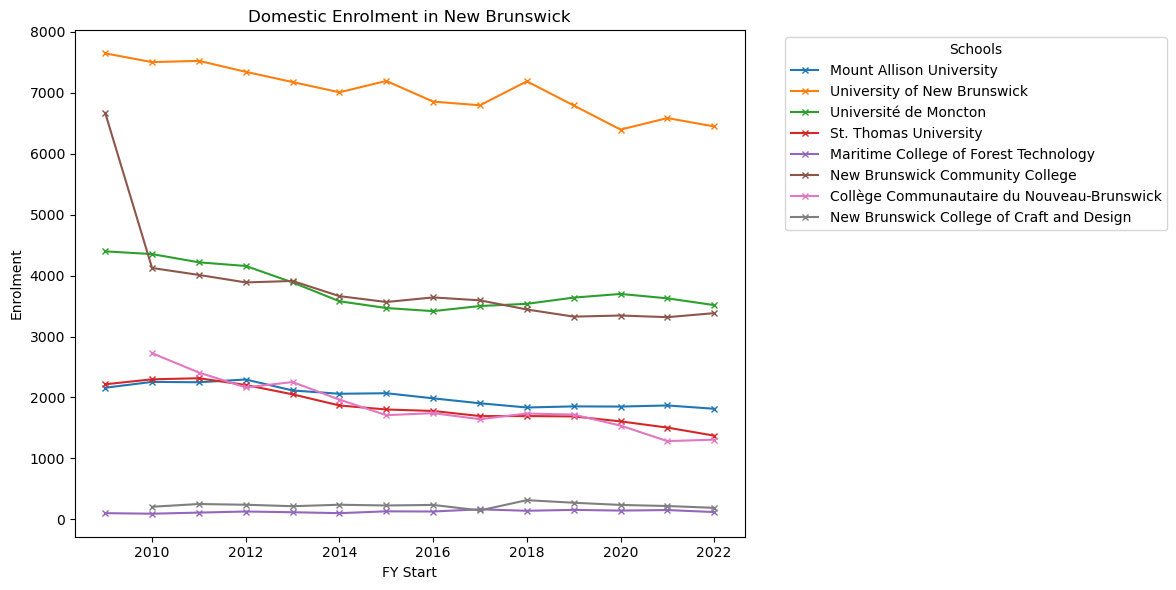

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_11702/3944359315.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


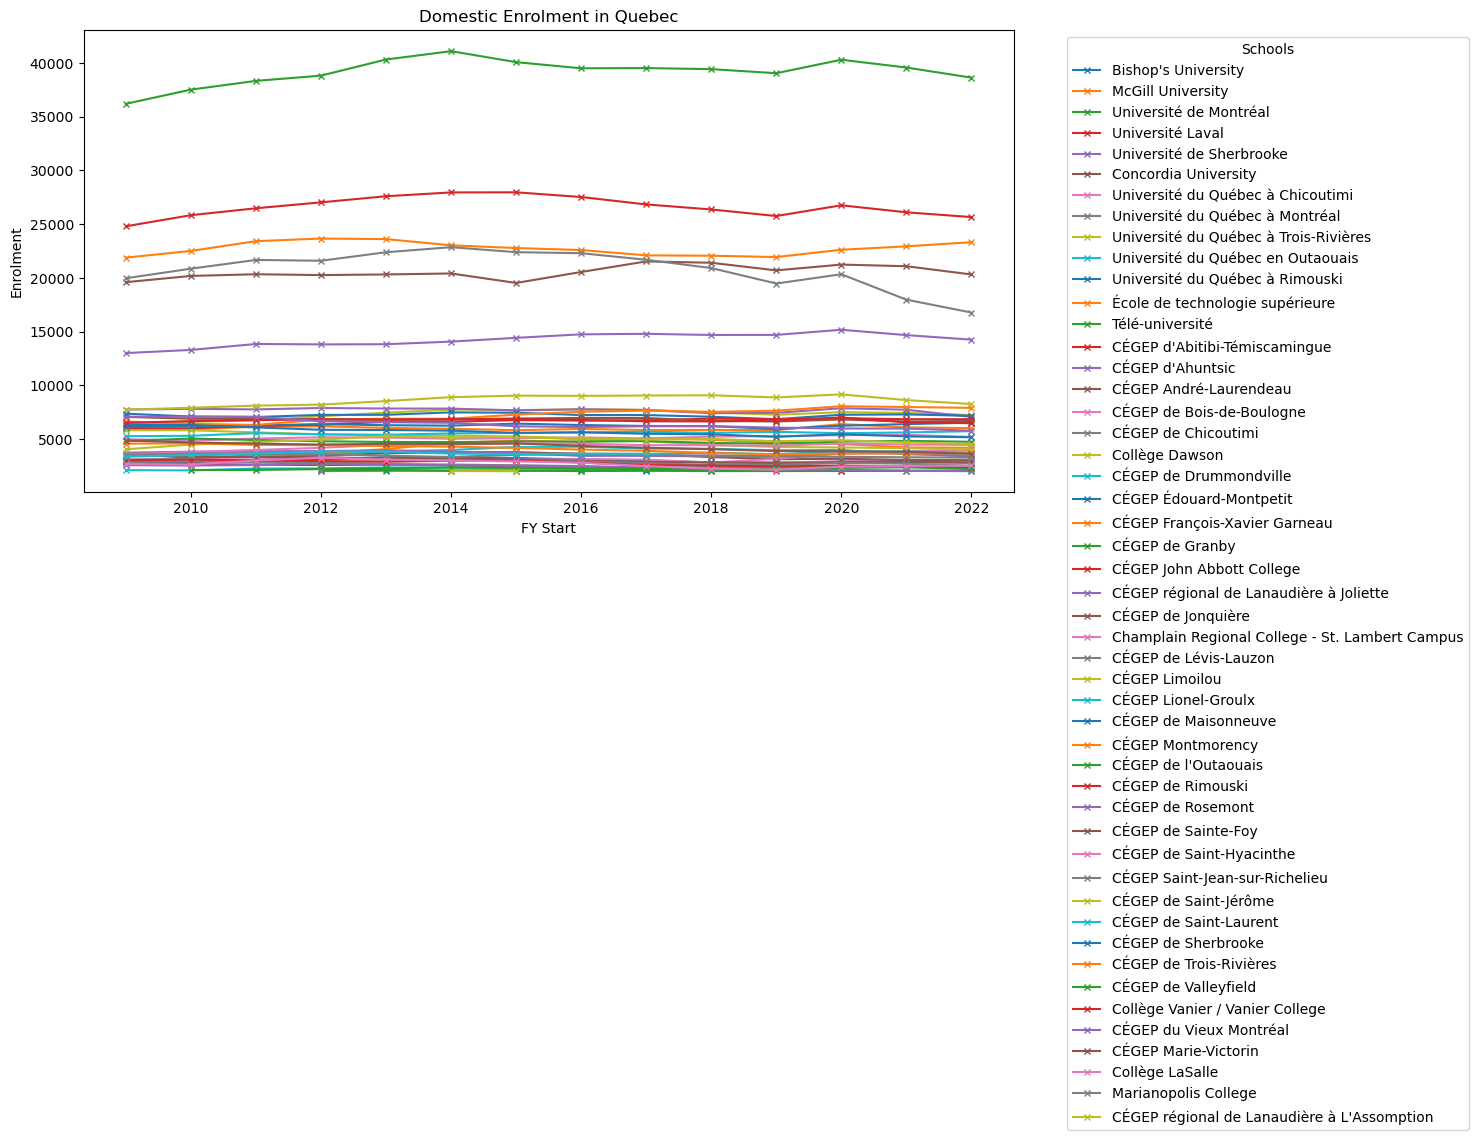

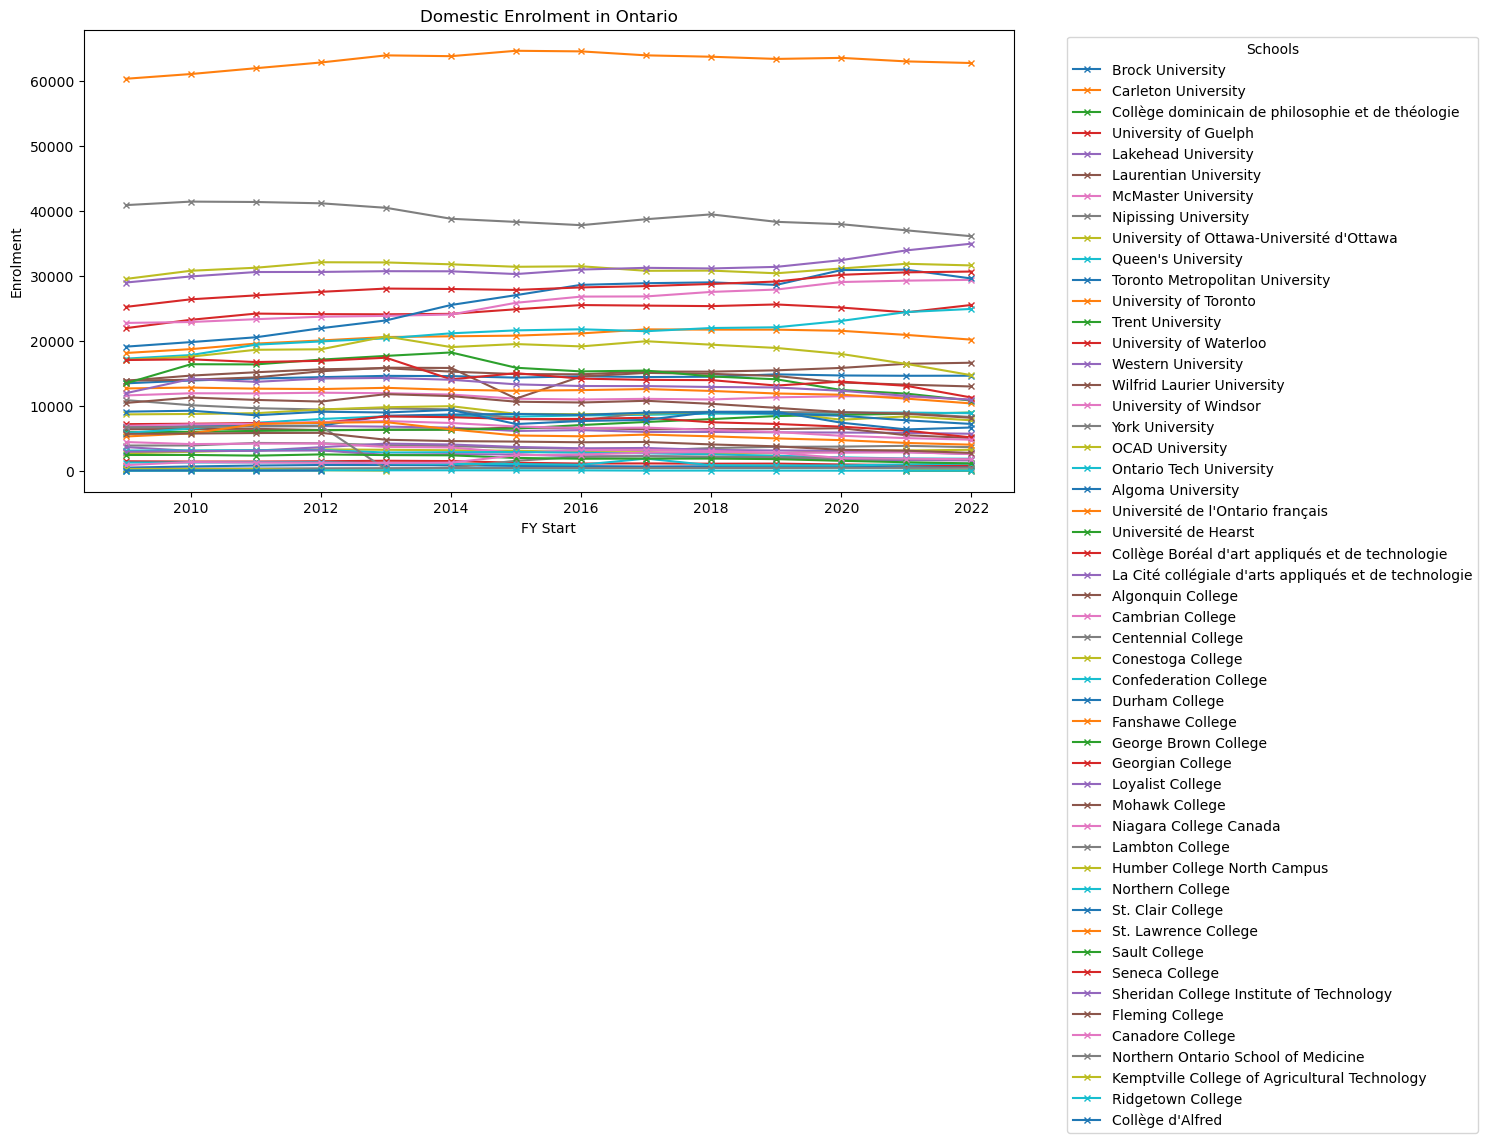

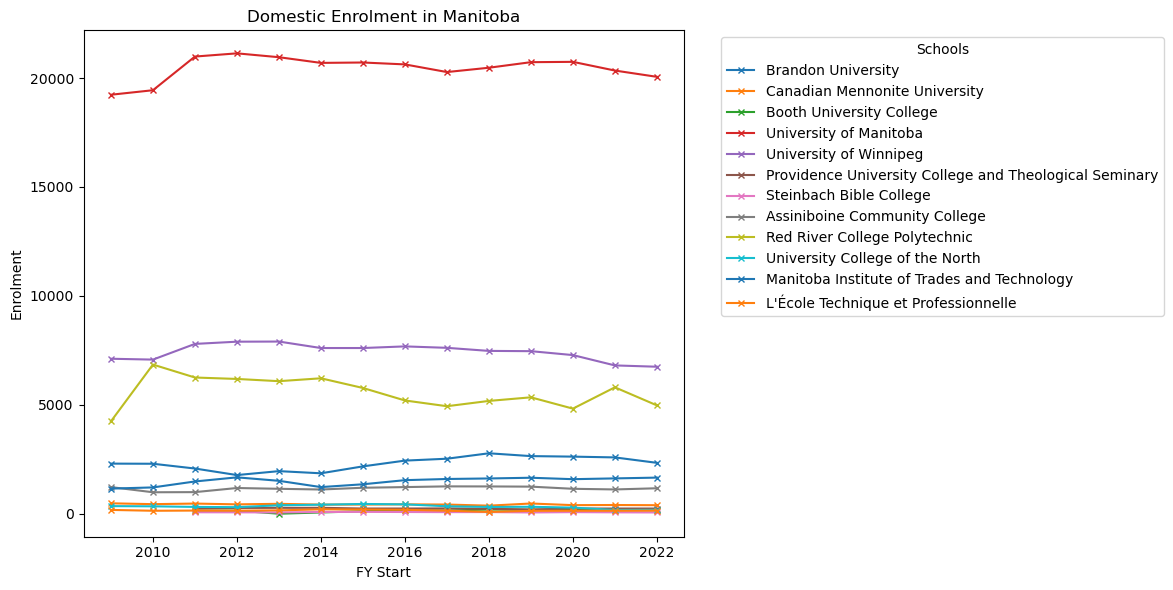

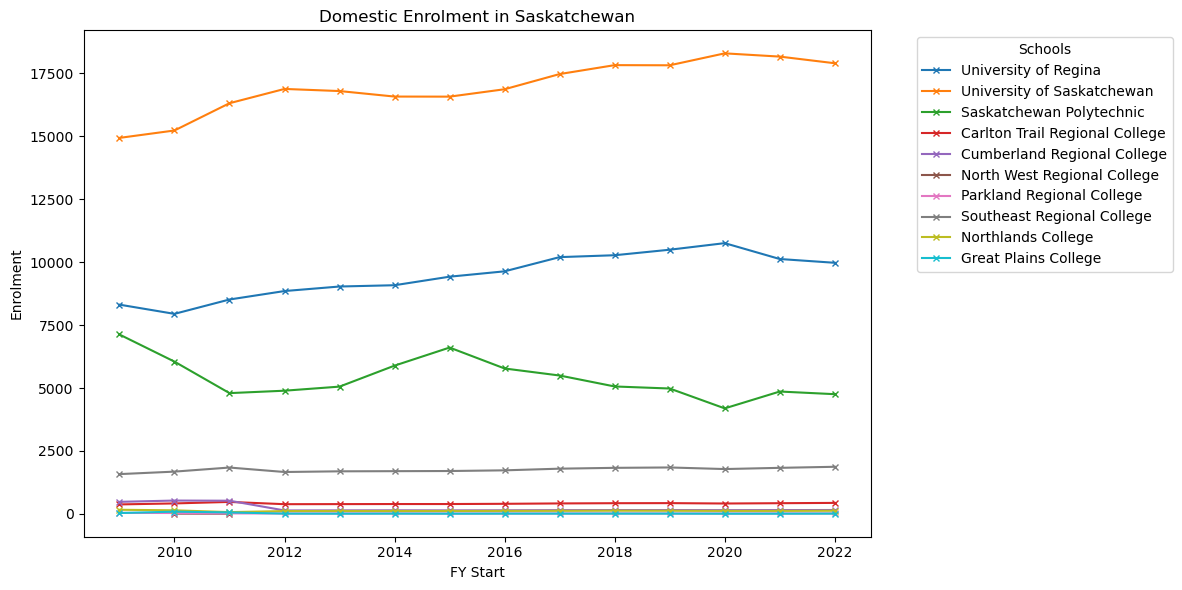

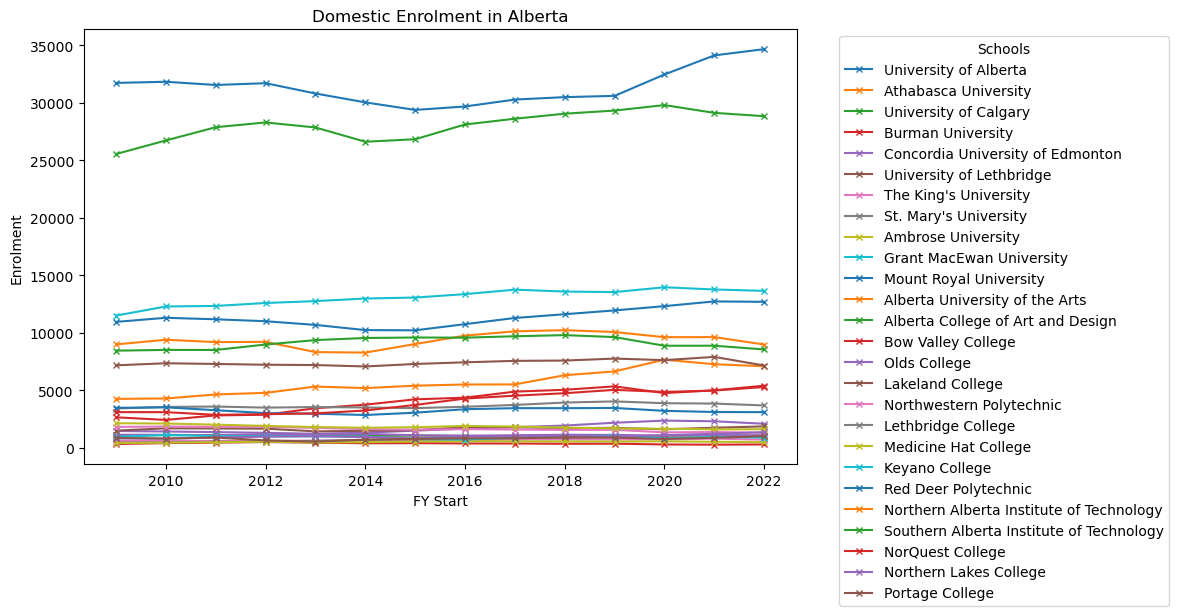

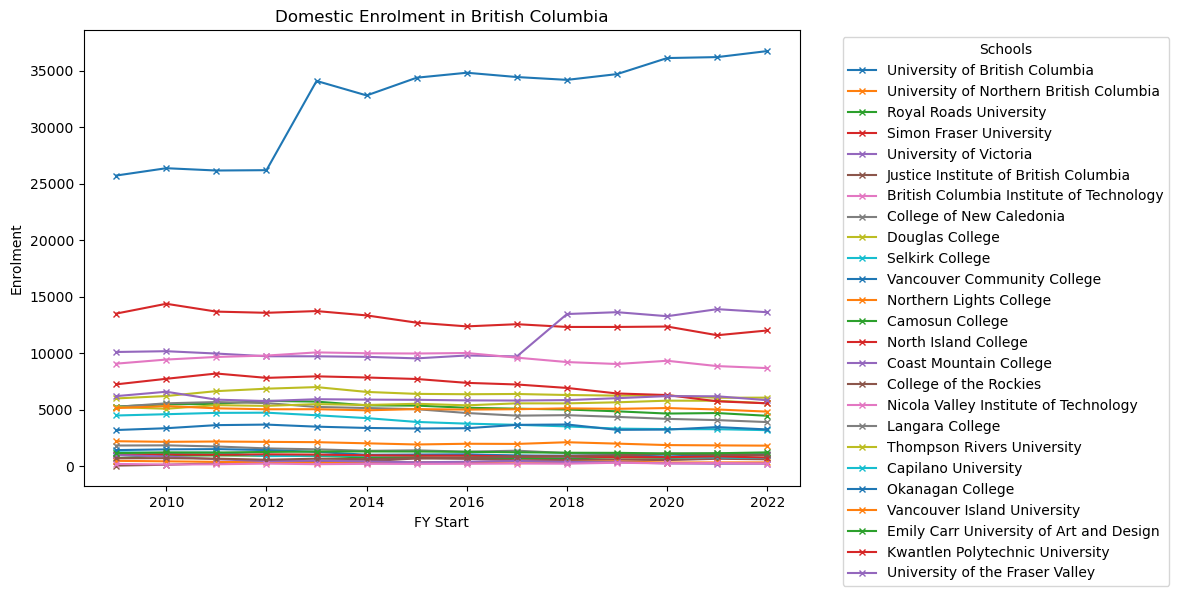

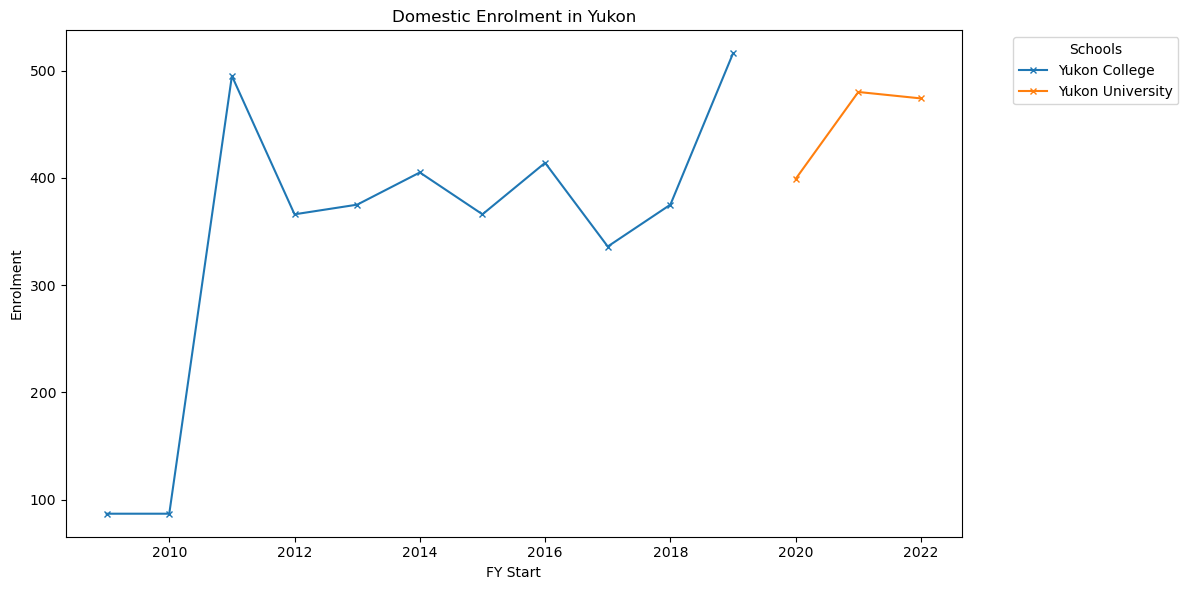

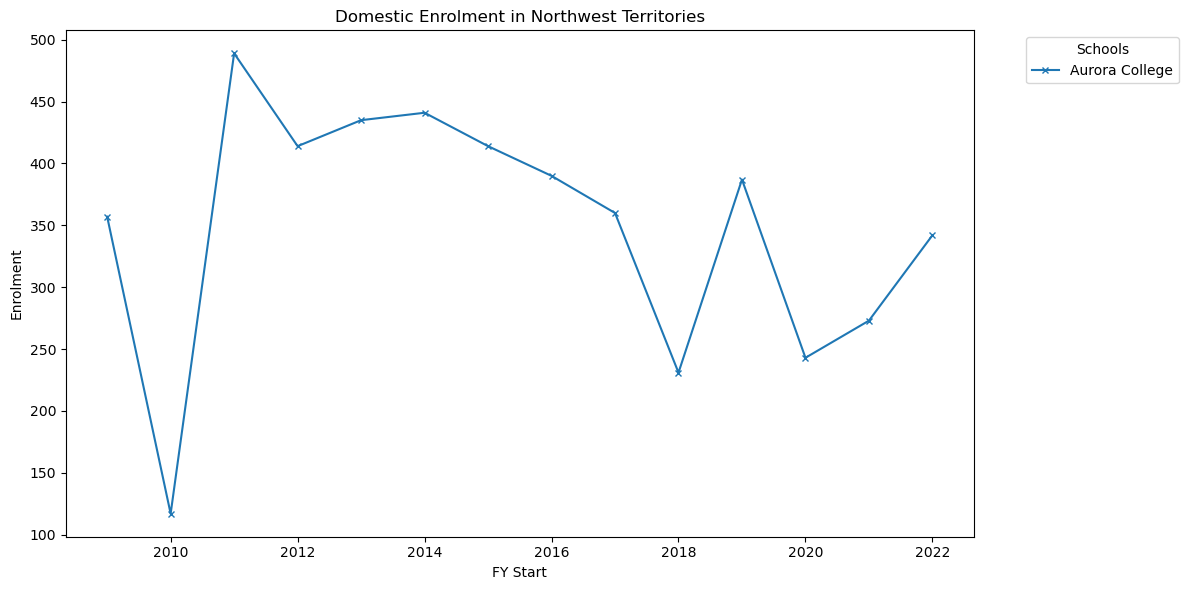

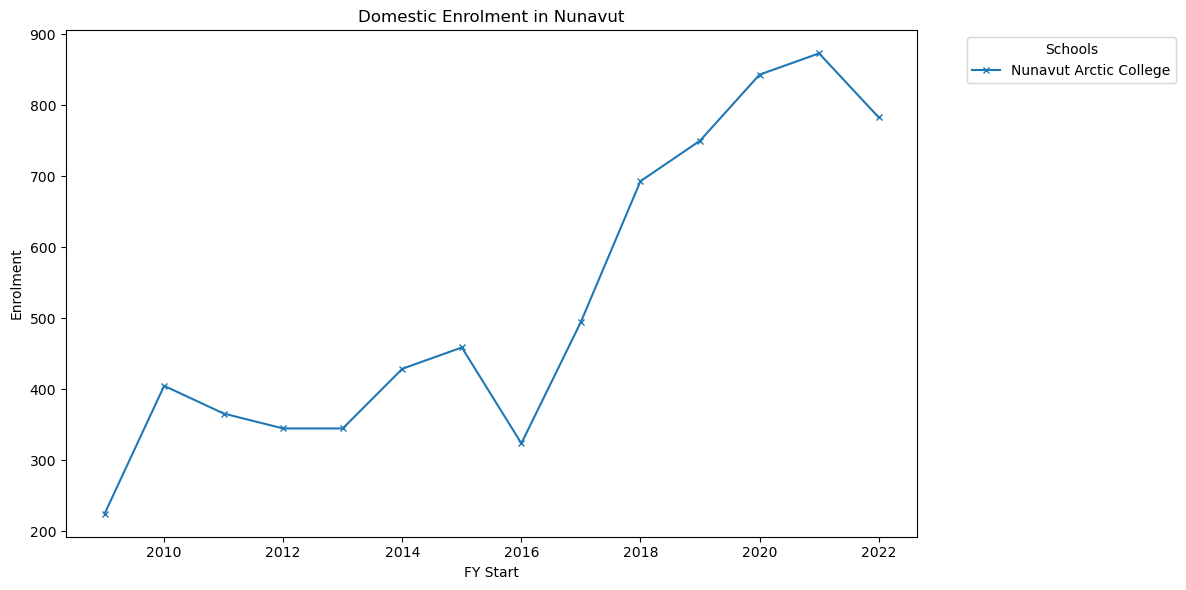

In [91]:
# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df[colleges_universities_df['Province/Territory'] == province]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # There are a LOT of small CEGEPs in Quebec that make the display tough to read, below will filter out under 2000 enrolment domestically
    if province == "Quebec":
        province_data = province_data[province_data['Enrolment'] >= 2000]

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'Domestic Enrolment in {province}')
    plt.xlabel('FY Start')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## International Students from Statcan info 2009/10 - 2022/23

In [92]:
# Try reading the CSV with a different encoding
df_intl = pd.read_csv("/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/statcan-FT-intl-09-23.csv", encoding='utf-8')

In [93]:
df_intl.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

In [94]:
# rename columns
df_intl.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [95]:
df_intl["FY Start"] = df_intl["FY Start"].apply(lambda x: int(x[:4]))

In [96]:
df_intl

FY Start                        School/Locality Registration status  \
0         2009                                 Canada   Full-time student   
1         2010                                 Canada   Full-time student   
2         2011                                 Canada   Full-time student   
3         2012                                 Canada   Full-time student   
4         2013                                 Canada   Full-time student   
...        ...                                    ...                 ...   
3246      2020  Aurora College, Northwest Territories   Full-time student   
3247      2021  Aurora College, Northwest Territories   Full-time student   
3248      2022  Aurora College, Northwest Territories   Full-time student   
3249      2014                                Nunavut   Full-time student   
3250      2014        Nunavut Arctic College, Nunavut   Full-time student   

                      Status  Enrolment  
0     International students     105702  
1     International students     114072  
2     International students     127467  
3     International students     141675  
4     International students     160038  
...                      ...        ...  
3246  International students          3  
3247  International students          0  
3248  International students          6  
3249  International students          3  
3250  International students          3  

[3251 rows x 5 columns]

In [97]:
# same as above to split provinces and territories with variables set above

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df_intl['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df_intl = df_intl[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df_intl = df_intl[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df_intl['Institution Name'] = non_canada_df_intl['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df_intl = non_canada_df_intl.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# Optionally, save the DataFrames to CSVs
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)

Number of rows in canada_df: 196
Number of rows in colleges_universities_df: 3292


## Start zoomed out - Canada-wide growth in international students

First things first, what is the nationwide growth in international student enrolment?

In [156]:
canada_data = canada_df_intl[canada_df_intl['School/Locality'] == "Canada"]

canada_data

FY Start School/Locality Registration status                  Status  \
0       2009          Canada   Full-time student  International students   
1       2010          Canada   Full-time student  International students   
2       2011          Canada   Full-time student  International students   
3       2012          Canada   Full-time student  International students   
4       2013          Canada   Full-time student  International students   
5       2014          Canada   Full-time student  International students   
6       2015          Canada   Full-time student  International students   
7       2016          Canada   Full-time student  International students   
8       2017          Canada   Full-time student  International students   
9       2018          Canada   Full-time student  International students   
10      2019          Canada   Full-time student  International students   
11      2020          Canada   Full-time student  International students   
12      2021          Canada   Full-time student  International students   
13      2022          Canada   Full-time student  International students   

    Enrolment  
0      105702  
1      114072  
2      127467  
3      141675  
4      160038  
5      181086  
6      195063  
7      219018  
8      254643  
9      296142  
10     340227  
11     329334  
12     360162  
13     421008

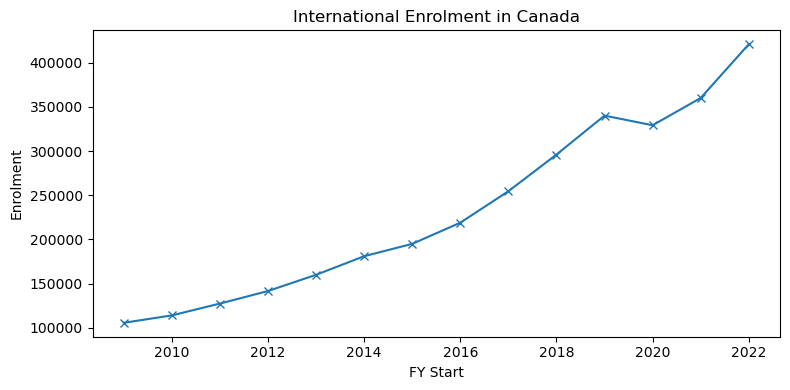

In [99]:
# plot Enrolment on y axis against FY start on x axis
plt.figure(figsize=(8, 4))
plt.plot(canada_data['FY Start'], canada_data['Enrolment'], marker='x')
plt.title('International Enrolment in Canada')
plt.xlabel('FY Start')
plt.ylabel('Enrolment')
plt.tight_layout()
plt.show()

The further along the trend goes, it begins go from a linear to somewhat exponential rise...let's check.

In [100]:
# plot the growth with a linear regression line and R^2 value
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear regression
# Extract x and y values
x = canada_data['FY Start'].values.reshape(-1, 1)  # FY Start as x (reshape for sklearn)
y = canada_data['Enrolment'].values

# Linear regression
linear_model = LinearRegression()
linear_model.fit(x, y)
linear_pred = linear_model.predict(x)
linear_r2 = r2_score(y, linear_pred)

linear_r2

0.9651751381783349

In [101]:
# Exponential regression
log_y = np.log(y)  # Transform y for exponential regression
exp_model = LinearRegression()
exp_model.fit(x, log_y)
exp_pred_log = exp_model.predict(x)
exp_pred = np.exp(exp_pred_log)  # Transform back to original scale
exp_r2 = r2_score(y, exp_pred)

exp_r2

0.9832301030193383

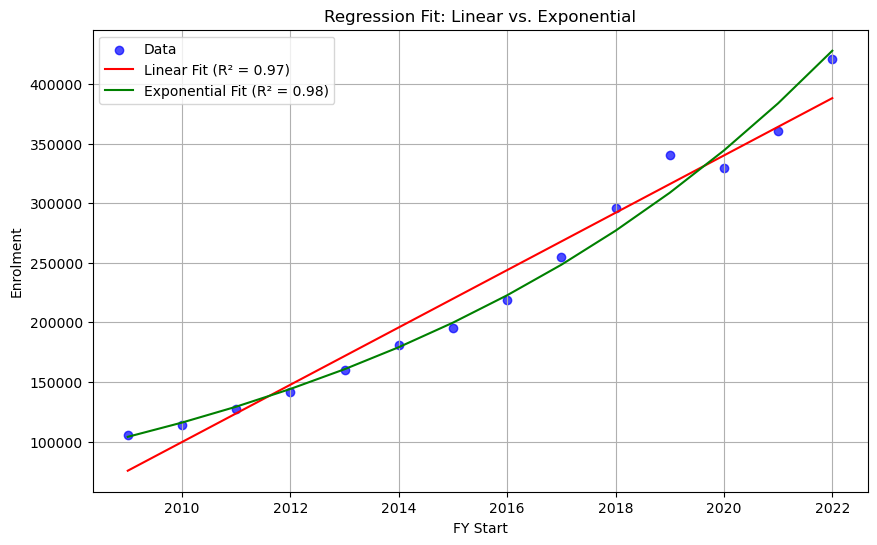

Linear R²: 0.97
Exponential R²: 0.98


In [102]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(canada_data['FY Start'], y, label="Data", color='blue', alpha=0.7)
plt.plot(canada_data['FY Start'], linear_pred, label=f"Linear Fit (R² = {linear_r2:.2f})", color='red')
plt.plot(canada_data['FY Start'], exp_pred, label=f"Exponential Fit (R² = {exp_r2:.2f})", color='green')
plt.xlabel('FY Start')
plt.ylabel('Enrolment')
plt.title('Regression Fit: Linear vs. Exponential')
plt.legend()
plt.grid()
plt.show()

# Results
print(f"Linear R²: {linear_r2:.2f}")
print(f"Exponential R²: {exp_r2:.2f}")

Mathematically it is borderline between linear/exponential and given COVID caused a major disruption, I don't think it's unfair to say it likely takes on more exponential character than linear.

An inspection of the line also shows the green line to be fitting with the data points more cleanly.

Plotting growth rate below:

In [103]:
# plot the growth YoY in international enrolment
canada_data['Enrolment Growth'] = canada_data['Enrolment'].diff()
canada_data['Enrolment Growth %'] = round((canada_data['Enrolment Growth'] / canada_data['Enrolment'].shift(1) * 100), 2) # shift(1) shifts the series by 1 to get the previous year's enrolment

# remove settingwithcopy warning
pd.options.mode.chained_assignment = None  # default='warn'

canada_data

FY Start School/Locality Registration status                  Status  \
0       2009          Canada   Full-time student  International students   
1       2010          Canada   Full-time student  International students   
2       2011          Canada   Full-time student  International students   
3       2012          Canada   Full-time student  International students   
4       2013          Canada   Full-time student  International students   
5       2014          Canada   Full-time student  International students   
6       2015          Canada   Full-time student  International students   
7       2016          Canada   Full-time student  International students   
8       2017          Canada   Full-time student  International students   
9       2018          Canada   Full-time student  International students   
10      2019          Canada   Full-time student  International students   
11      2020          Canada   Full-time student  International students   
12      2021          Canada   Full-time student  International students   
13      2022          Canada   Full-time student  International students   

    Enrolment  Enrolment Growth  Enrolment Growth %  
0      105702               NaN                 NaN  
1      114072            8370.0                7.92  
2      127467           13395.0               11.74  
3      141675           14208.0               11.15  
4      160038           18363.0               12.96  
5      181086           21048.0               13.15  
6      195063           13977.0                7.72  
7      219018           23955.0               12.28  
8      254643           35625.0               16.27  
9      296142           41499.0               16.30  
10     340227           44085.0               14.89  
11     329334          -10893.0               -3.20  
12     360162           30828.0                9.36  
13     421008           60846.0               16.89

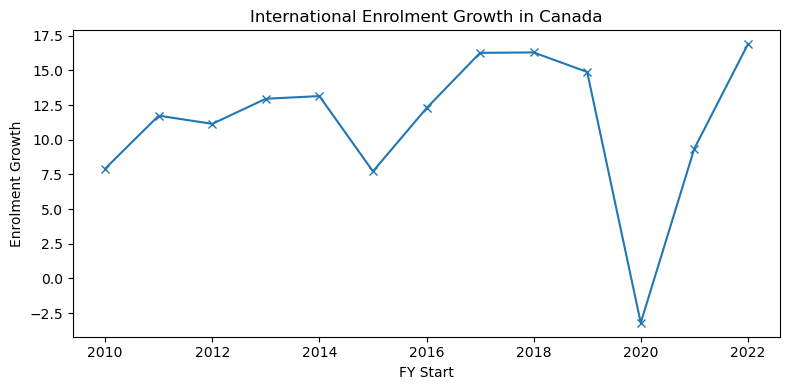

In [104]:
# plot the growth YoY in international enrolment
plt.figure(figsize=(8, 4))
plt.plot(canada_data['FY Start'], canada_data['Enrolment Growth %'], marker='x')
plt.title('International Enrolment Growth in Canada')
plt.xlabel('FY Start')
plt.ylabel('Enrolment Growth')
plt.tight_layout() # adjust the plot to fit the labels
plt.show()

We can see it was fairly consistently double digit growth (growth on growth)

## Visualising International Enrolment across Provinces & Schools 2009/10 - 2022/23

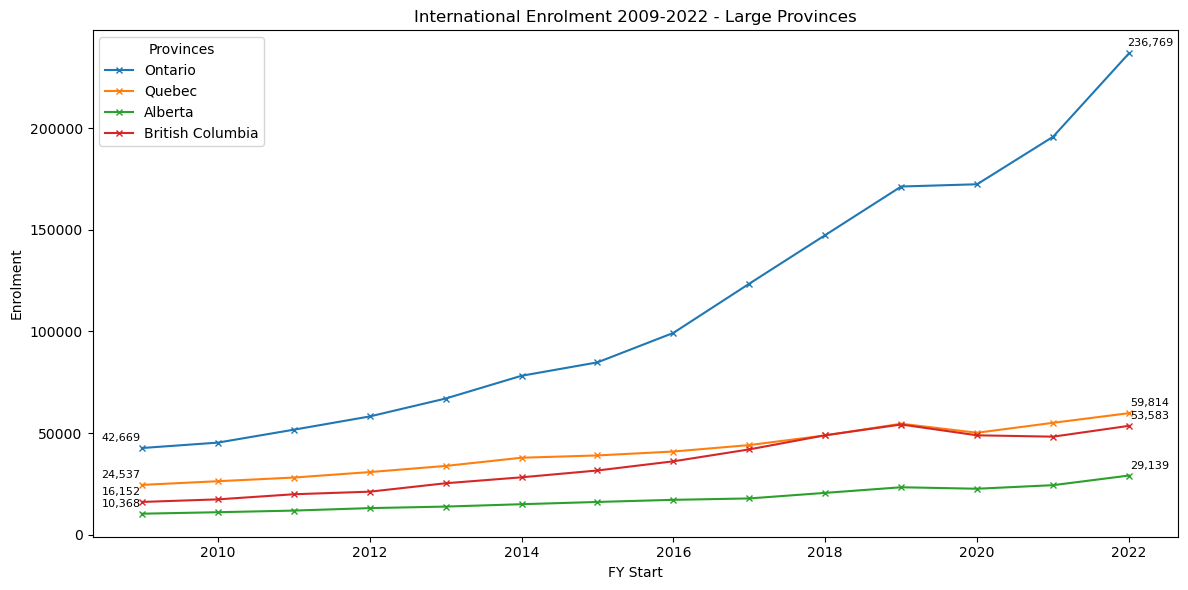

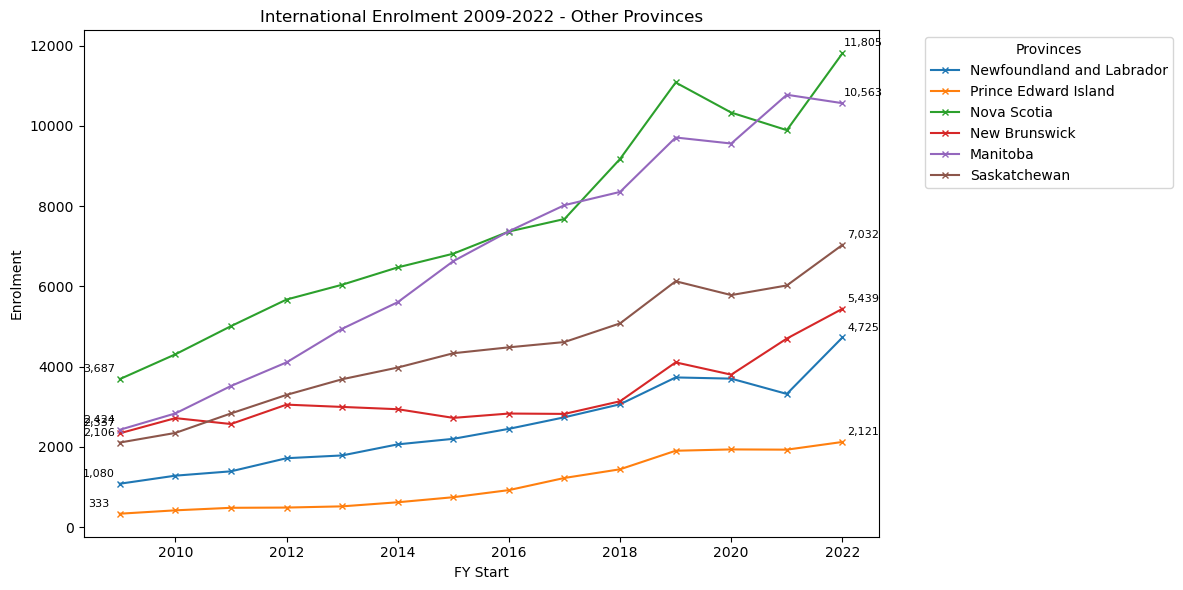

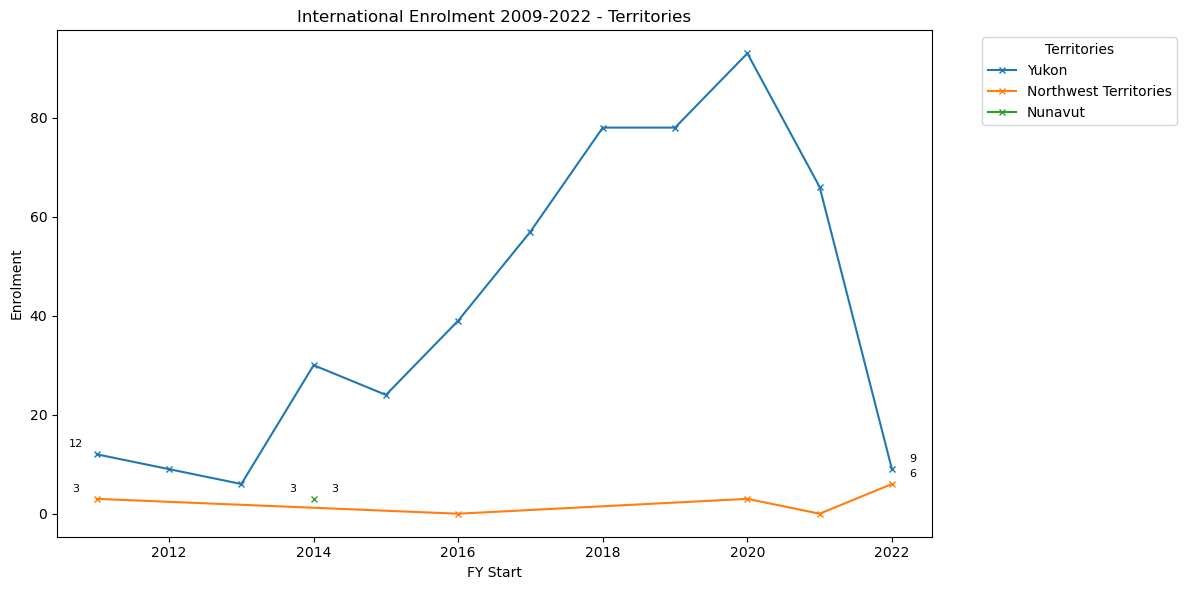

In [105]:
# Filter out rows where 'School/Locality' is "Canada"
provinces_df_intl = canada_df_intl[~canada_df_intl['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df_intl['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Function to annotate the first and last y-values
def annotate_first_and_last_points(ax, x_data, y_data, label):
    if len(x_data) > 0 and len(y_data) > 0:
        # Annotate the first point (Fiscal Year 2009)
        ax.annotate(f'{y_data.iloc[0]:,.0f}', (x_data.iloc[0], y_data.iloc[0]),
                    textcoords="offset points", xytext=(-15, 5), ha='center', fontsize=8)
        
        # Annotate the last point (Fiscal Year 2022)
        ax.annotate(f'{y_data.iloc[-1]:,.0f}', (x_data.iloc[-1], y_data.iloc[-1]),
                    textcoords="offset points", xytext=(15, 5), ha='center', fontsize=8)

# Create the first graph for large population provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('International Enrolment 2009-2022 - Large Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('International Enrolment 2009-2022 - Other Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
fig, ax = plt.subplots(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df_intl[provinces_df_intl['School/Locality'] == territory]
    ax.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, territory_data['FY Start'], territory_data['Enrolment'], territory)
ax.set_title('International Enrolment 2009-2022 - Territories')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [106]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df_intl[['School Name', 'Province/Territory']] = colleges_universities_df_intl['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df_intl.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df_intl.head())

    FY Start Registration status                  Status  Enrolment  \
28      2009   Full-time student  International students       1038   
29      2010   Full-time student  International students       1230   
30      2011   Full-time student  International students       1341   
31      2012   Full-time student  International students       1650   
32      2013   Full-time student  International students       1725   

                            School Name         Province/Territory  
28  Memorial University of Newfoundland  Newfoundland and Labrador  
29  Memorial University of Newfoundland  Newfoundland and Labrador  
30  Memorial University of Newfoundland  Newfoundland and Labrador  
31  Memorial University of Newfoundland  Newfoundland and Labrador  
32  Memorial University of Newfoundland  Newfoundland and Labrador  


In [107]:
# light cleaing - remove "of Applied Arts & Technology" and "of Applied Arts and Technology" from all school names
colleges_universities_df_intl['School Name'] = colleges_universities_df_intl['School Name'].str.replace(
    " of Applied Arts and Technology", "", regex=False
)

colleges_universities_df_intl['School Name'] = colleges_universities_df_intl['School Name'].str.replace(
    " Institute of Technology and Advanced Learning", "", regex=False
)

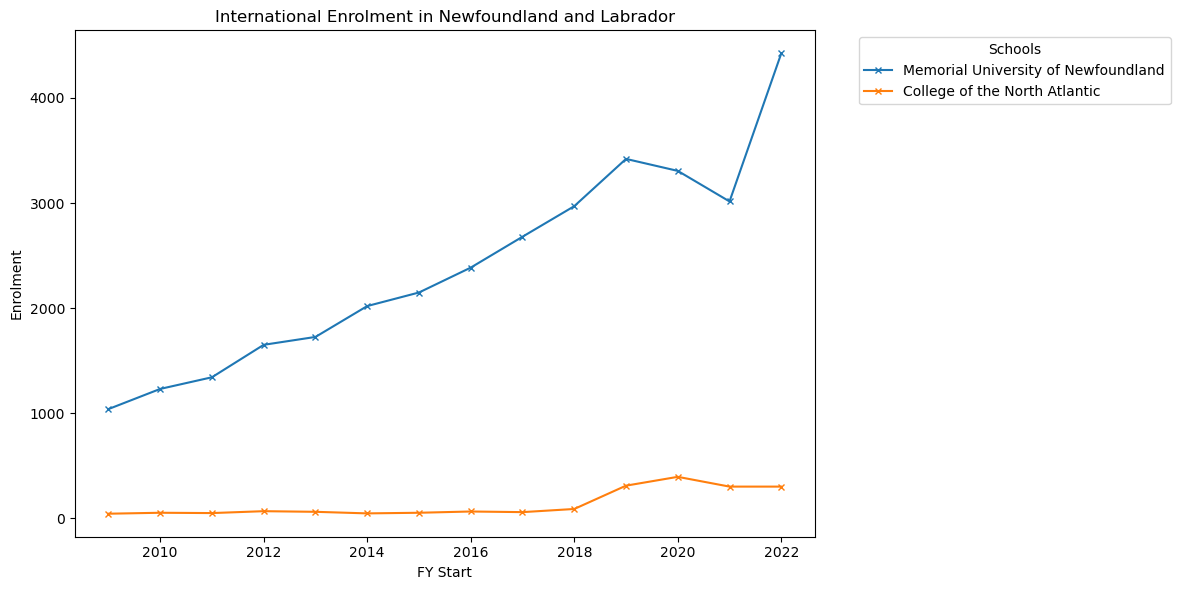

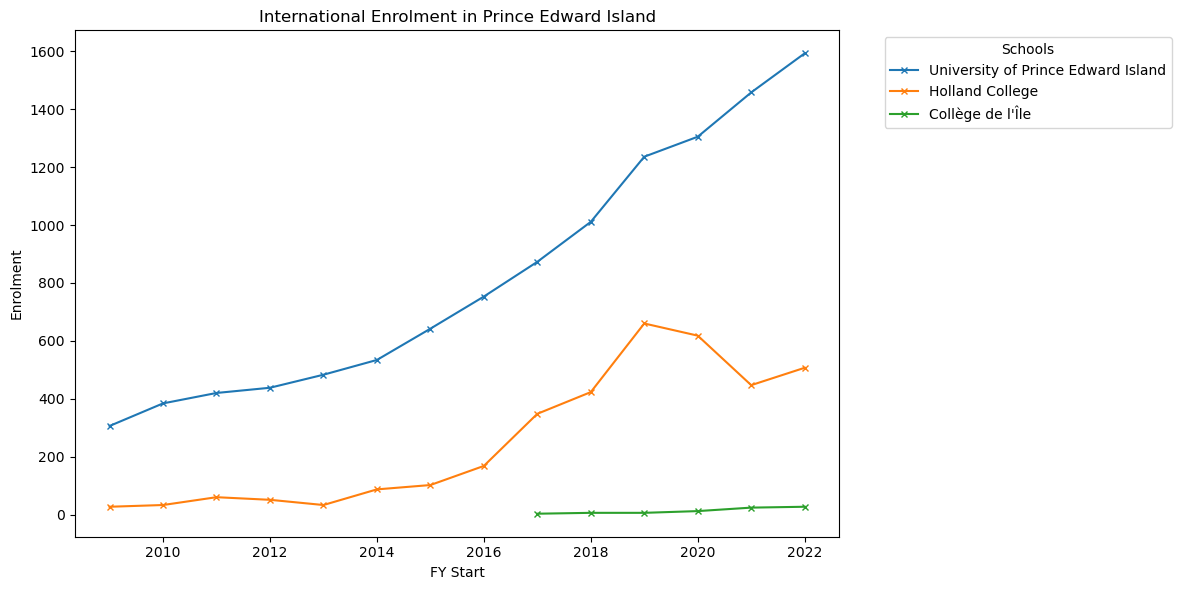

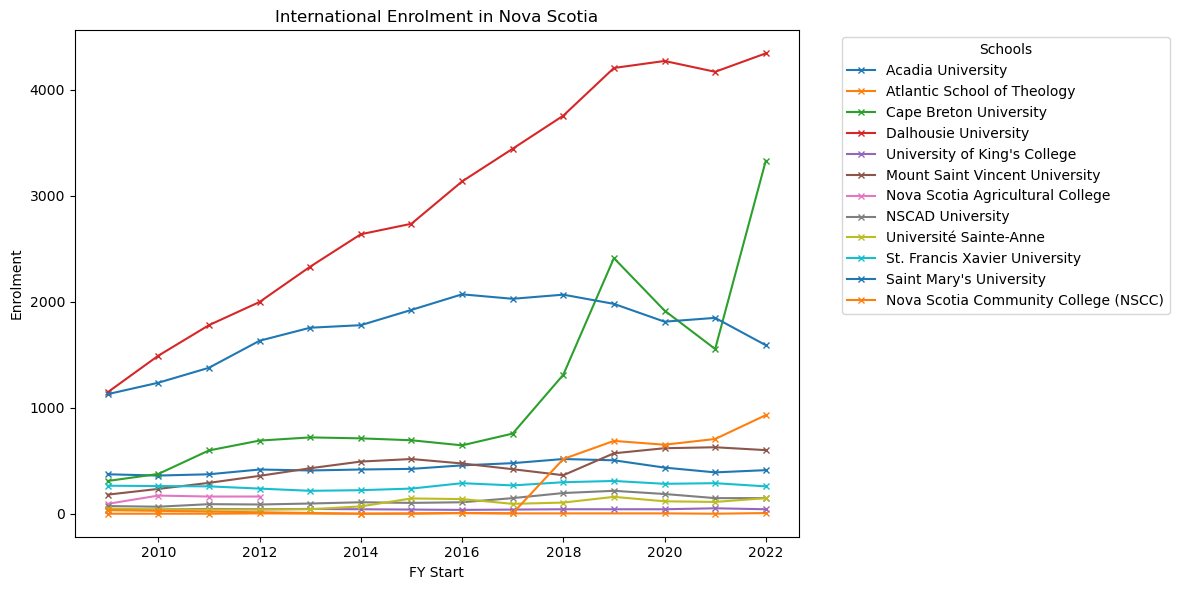

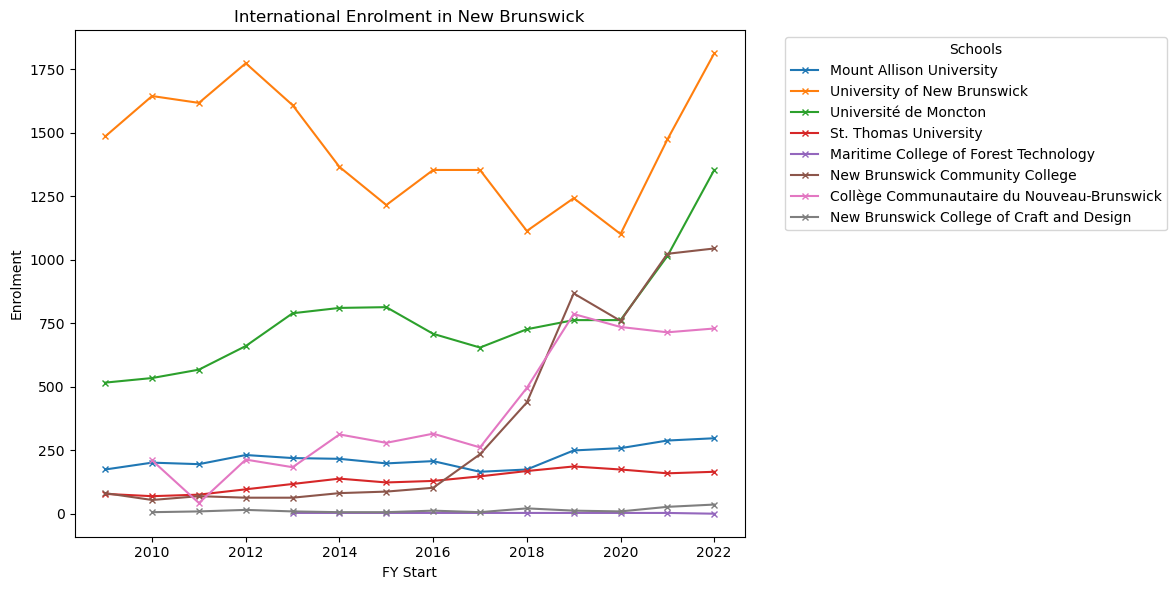

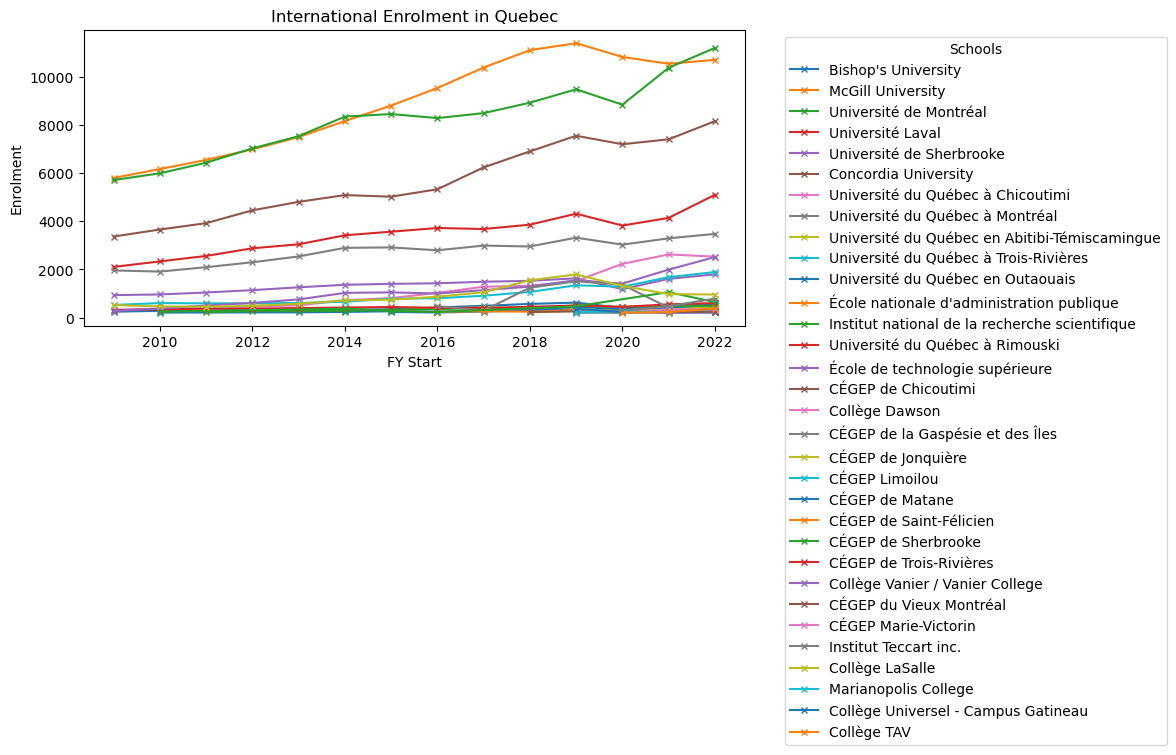

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_11702/1225446732.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


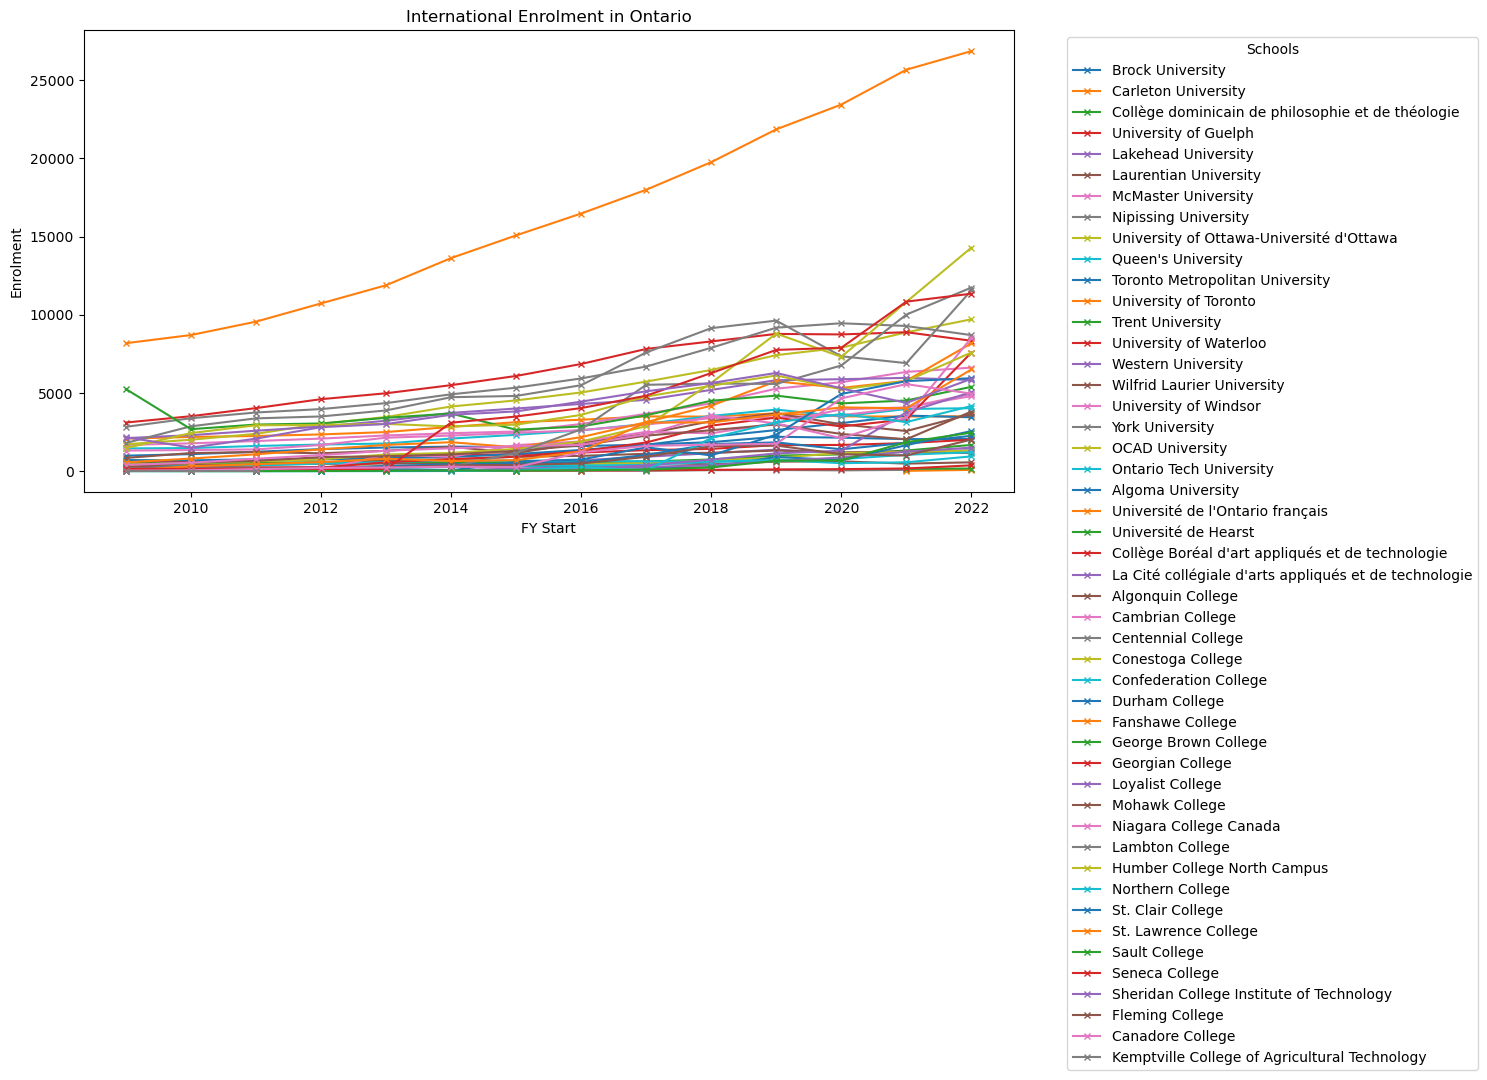

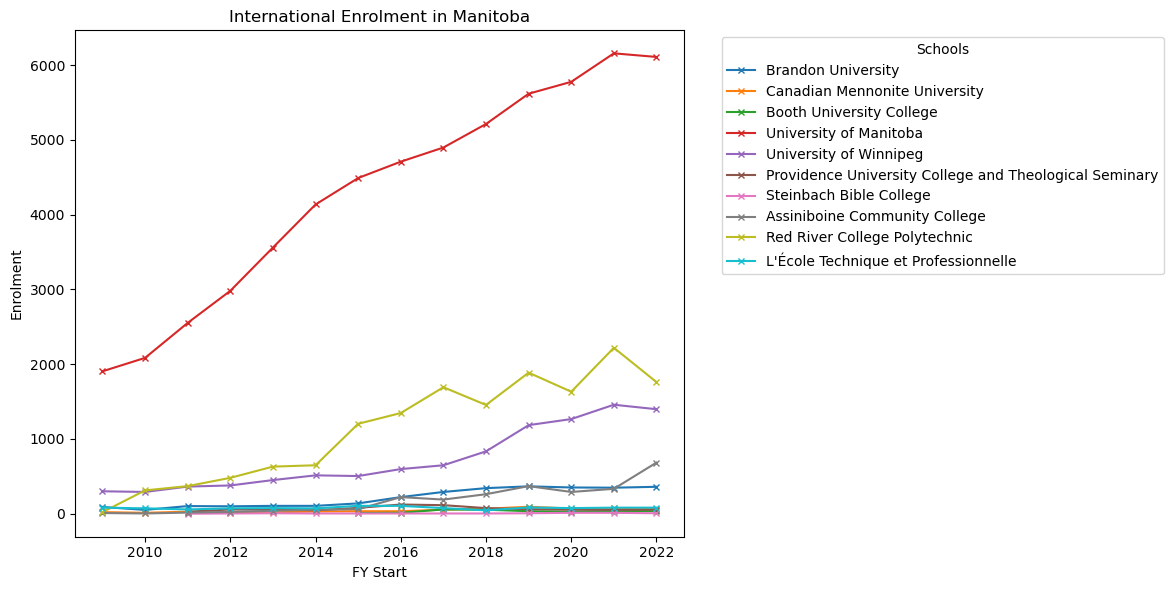

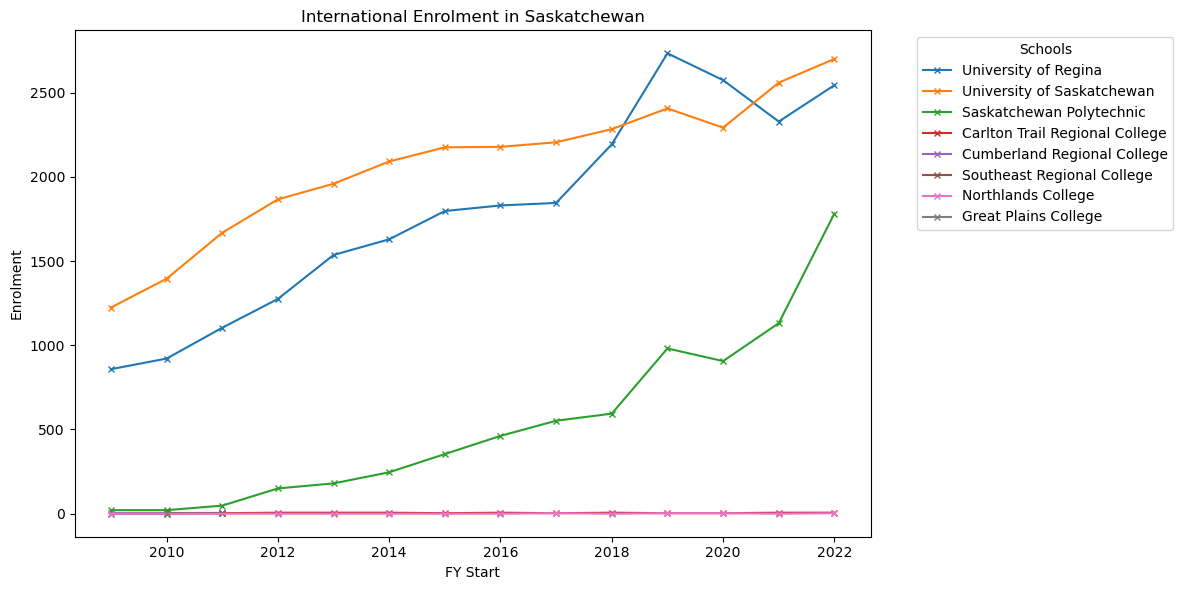

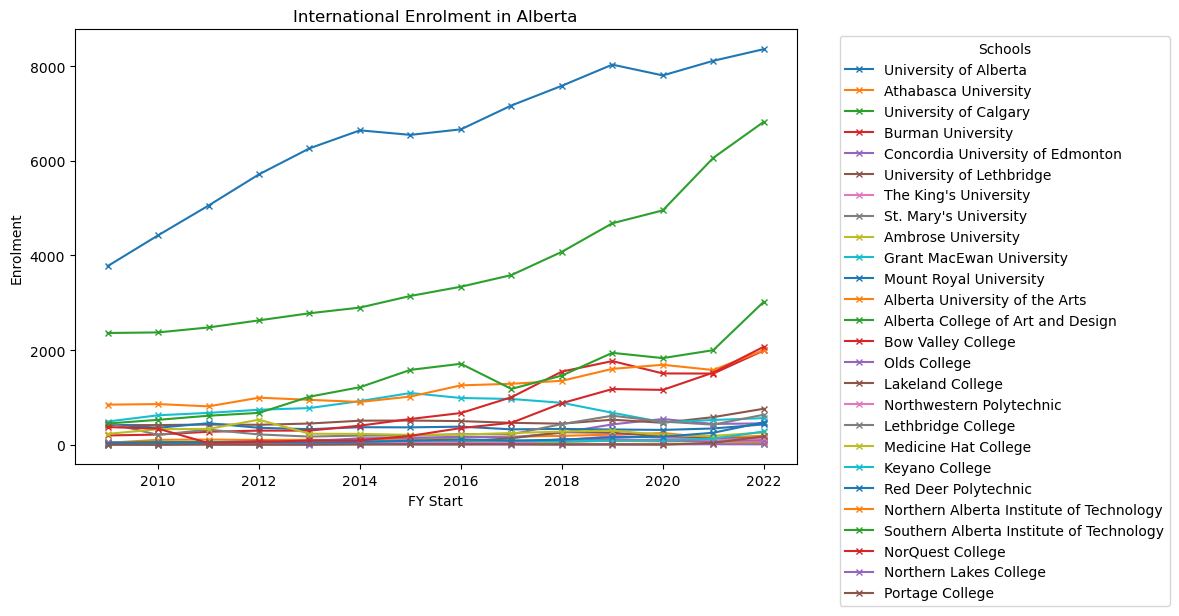

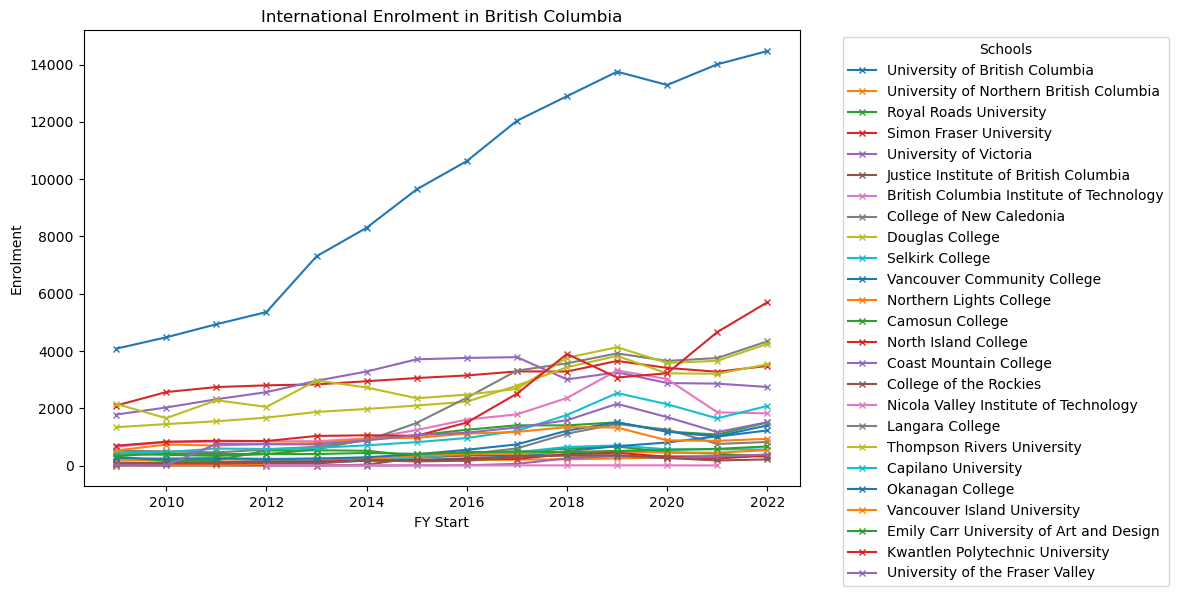

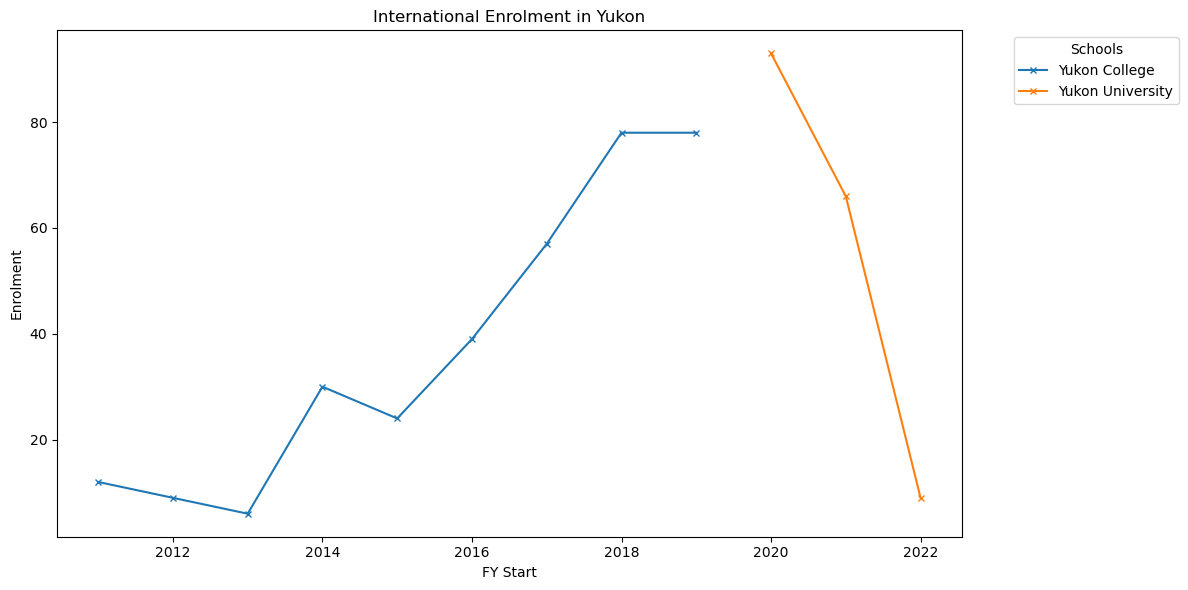

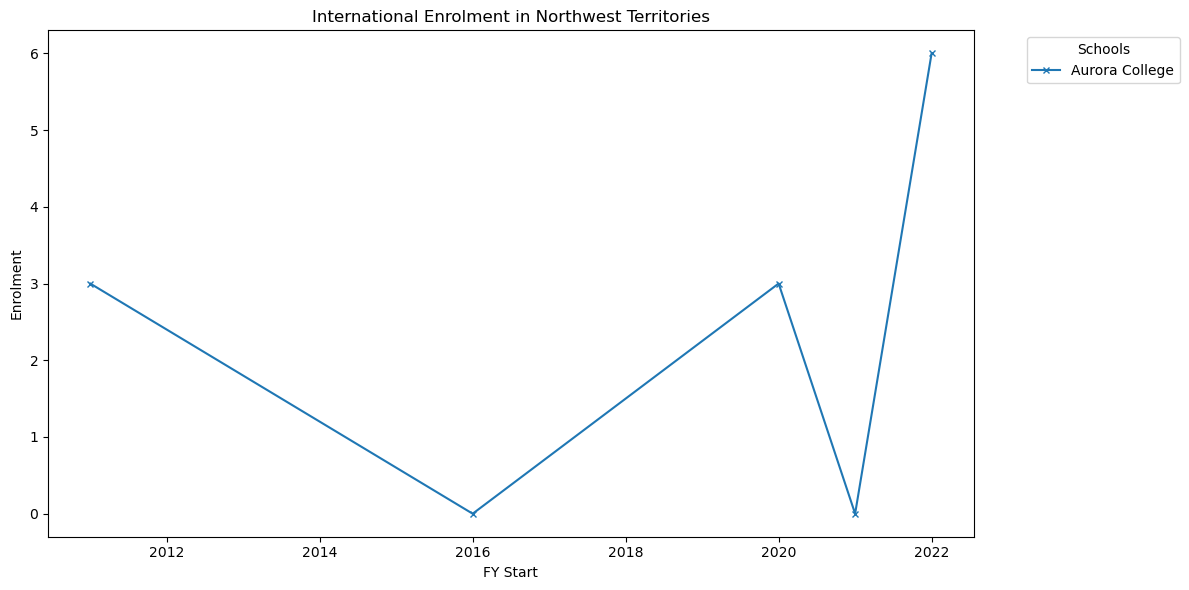

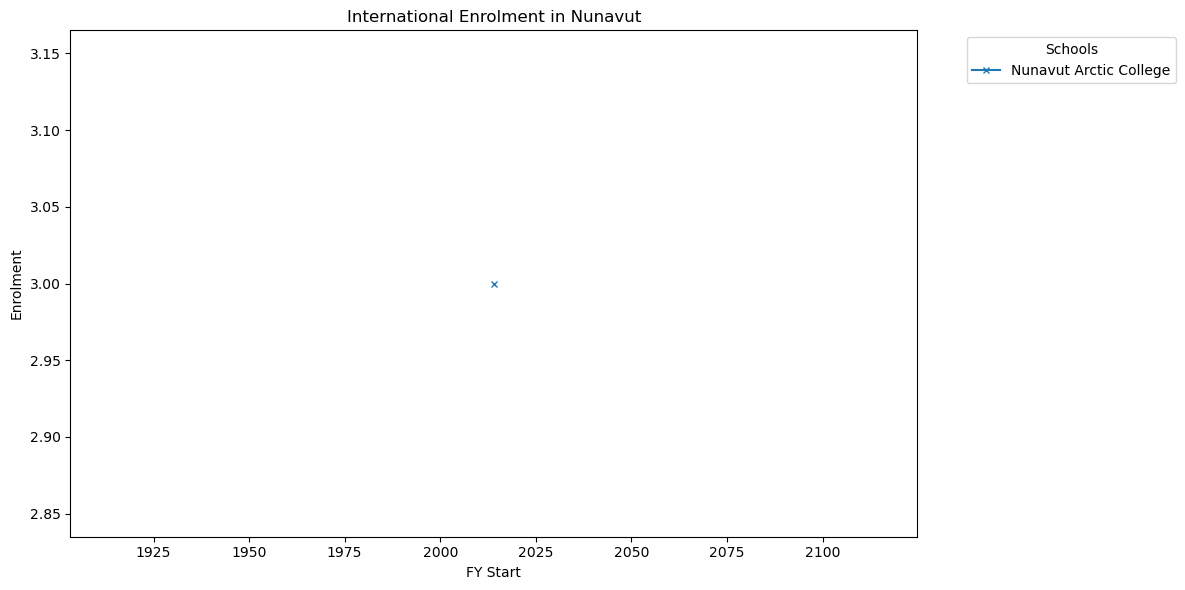

In [108]:
# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df_intl['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df_intl[colleges_universities_df_intl['Province/Territory'] == province]

    # Apply the condition for Quebec - there are a LOT of tiny CEGEPs that make the display tough to read
    if province == "Quebec":
        province_data = province_data[province_data['Enrolment'] >= 200]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'International Enrolment in {province}')
    plt.xlabel('FY Start')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

With the last three figures, we can see that compared to the provinces, the territories are incredibly small numbers and it's doubtful they have any contribution to international student trends seen in the provinces. They are two or three orders of magnitude smaller than everybody else.

For that reason we will **leave the territories out of the analysis** from here on.

## Combining Domestic and International enrolment in each province

### Pivot the tables so that every row is one institution in one year, with international and domestic enrolment, which we will then combine in one dataframe

In [109]:
colleges_universities_df.head()

FY Start Registration status             Status  Enrolment  \
28      2009   Full-time student  Canadian students      14298   
29      2010   Full-time student  Canadian students      14196   
30      2011   Full-time student  Canadian students      14097   
31      2012   Full-time student  Canadian students      13923   
32      2013   Full-time student  Canadian students      13611   

                            School Name         Province/Territory  
28  Memorial University of Newfoundland  Newfoundland and Labrador  
29  Memorial University of Newfoundland  Newfoundland and Labrador  
30  Memorial University of Newfoundland  Newfoundland and Labrador  
31  Memorial University of Newfoundland  Newfoundland and Labrador  
32  Memorial University of Newfoundland  Newfoundland and Labrador

In [110]:
colleges_universities_df_intl.head()

FY Start Registration status                  Status  Enrolment  \
28      2009   Full-time student  International students       1038   
29      2010   Full-time student  International students       1230   
30      2011   Full-time student  International students       1341   
31      2012   Full-time student  International students       1650   
32      2013   Full-time student  International students       1725   

                            School Name         Province/Territory  
28  Memorial University of Newfoundland  Newfoundland and Labrador  
29  Memorial University of Newfoundland  Newfoundland and Labrador  
30  Memorial University of Newfoundland  Newfoundland and Labrador  
31  Memorial University of Newfoundland  Newfoundland and Labrador  
32  Memorial University of Newfoundland  Newfoundland and Labrador

Because of the very small numbers involved, I will ignore the territories of Nunavut, Yukon and Northwest Territory

In [111]:
# List of territories to exclude
territories = ["Yukon", "Northwest Territories", "Nunavut"]

# Step 1: Filter out territories from colleges_universities_df and include 'Province/Territory' in the index
domestic_df = colleges_universities_df[
    (colleges_universities_df['Status'] == 'Canadian students') &
    (~colleges_universities_df['Province/Territory'].isin(territories))
].pivot_table(
    index=['School Name', 'Province/Territory', 'FY Start'],
    values='Enrolment',
    aggfunc='sum'
).reset_index()

# Rename the 'Enrolment' column to 'Domestic Enrolment'
domestic_df.rename(columns={'Enrolment': 'Domestic Enrolment'}, inplace=True)

# Step 2: Filter out territories from colleges_universities_df_intl and include 'Province/Territory' in the index
international_df = colleges_universities_df_intl[
    (colleges_universities_df_intl['Status'] == 'International students') &
    (~colleges_universities_df_intl['Province/Territory'].isin(territories))
].pivot_table(
    index=['School Name', 'Province/Territory', 'FY Start'],
    values='Enrolment',
    aggfunc='sum'
).reset_index()

# Rename the 'Enrolment' column to 'International Enrolment'
international_df.rename(columns={'Enrolment': 'International Enrolment'}, inplace=True)

# Step 3: Join the two DataFrames on 'School Name', 'Province/Territory', and 'FY Start'
combined_df = pd.merge(
    domestic_df,
    international_df,
    on=['School Name', 'Province/Territory', 'FY Start'],
    how='outer'
)

# Fill any NaN values with 0, as some institutions might not have data for both domestic and international enrolments
combined_df.fillna(0, inplace=True)

# Display the combined DataFrame
print(combined_df)


                    School Name Province/Territory  FY Start  \
0             Acadia University        Nova Scotia      2009   
1             Acadia University        Nova Scotia      2010   
2             Acadia University        Nova Scotia      2011   
3             Acadia University        Nova Scotia      2012   
4             Acadia University        Nova Scotia      2013   
...                         ...                ...       ...   
3246  École nationale de Cirque             Quebec      2018   
3247  École nationale de Cirque             Quebec      2019   
3248  École nationale de Cirque             Quebec      2020   
3249  École nationale de Cirque             Quebec      2021   
3250  École nationale de Cirque             Quebec      2022   

      Domestic Enrolment  International Enrolment  
0                 2667.0                    372.0  
1                 2727.0                    360.0  
2                 2976.0                    372.0  
3                 3135.

In [112]:
combined_df

School Name Province/Territory  FY Start  \
0             Acadia University        Nova Scotia      2009   
1             Acadia University        Nova Scotia      2010   
2             Acadia University        Nova Scotia      2011   
3             Acadia University        Nova Scotia      2012   
4             Acadia University        Nova Scotia      2013   
...                         ...                ...       ...   
3246  École nationale de Cirque             Quebec      2018   
3247  École nationale de Cirque             Quebec      2019   
3248  École nationale de Cirque             Quebec      2020   
3249  École nationale de Cirque             Quebec      2021   
3250  École nationale de Cirque             Quebec      2022   

      Domestic Enrolment  International Enrolment  
0                 2667.0                    372.0  
1                 2727.0                    360.0  
2                 2976.0                    372.0  
3                 3135.0                    417.0  
4                 3288.0                    408.0  
...                  ...                      ...  
3246                42.0                     54.0  
3247                69.0                     60.0  
3248                63.0                     51.0  
3249                45.0                     54.0  
3250                42.0                     60.0  

[3251 rows x 5 columns]

Add the Francophone tag - 1 represents that the main language of instruction is French.

In [113]:
# List of strings that indicate the school is Francophone
francophone_schools = [
    "Université Sainte-Anne", "Collège Boréal", "Collège d'Alfred", 
    "Collège dominicain", "La Cité collégiale", "Université de Hearst", 
    "Université de l'Ontario français", "Université de Moncton", 
    "Collège Communautaire du Nouveau-Brunswick", "Collège de l'Île", "L'École Technique et Professionnelle"
]

# Create the "Francophone" column with 0 as the default value
combined_df['Francophone'] = 0

# Update the "Francophone" column based on the School Name
combined_df['Francophone'] = combined_df.apply(
    lambda row: 1 if (
        any(francophone in row['School Name'] for francophone in francophone_schools) or 
        (row['Province/Territory'] == "Quebec" and "McGill University" not in row['School Name'])
    ) else 0,
    axis=1
)

# Display the updated DataFrame
print(combined_df[['School Name', 'Province/Territory', 'Francophone']].head())


         School Name Province/Territory  Francophone
0  Acadia University        Nova Scotia            0
1  Acadia University        Nova Scotia            0
2  Acadia University        Nova Scotia            0
3  Acadia University        Nova Scotia            0
4  Acadia University        Nova Scotia            0


We now have every institution in every FY from 2011- to 2021- with their domestic and international enrolment side by side

In [114]:
# create a domestic/international ratio column
combined_df['% International'] = round((combined_df['International Enrolment'] / (combined_df['Domestic Enrolment'] + combined_df['International Enrolment'])) * 100, 2)

In [115]:
combined_df['% International'].sort_values(ascending=False)

129     100.00
1777     86.74
1776     84.70
3028     84.38
2126     81.39
         ...  
128       0.00
2045      0.00
2044      0.00
2043      0.00
736       0.00
Name: % International, Length: 3251, dtype: float64

To plot the provincial behaviour as a total and an average, we will create 2 new record rows for every province and every FY. One that average the figures for every province in every year and one that sums them up.

We will also need to do this to distinguish Francophone schools from others in the eastern provinces like ON, NB, PEI and NS. We have assumed all of QC, except McGill University is primarily Francophone

In [116]:
import pandas as pd

# Mapping of full province names to their codes - easier to read
province_codes = {
    "British Columbia": "BC",
    "Alberta": "AB",
    "Ontario": "ON",
    "Prince Edward Island": "PEI",
    "New Brunswick": "NB",
    "Nova Scotia": "NS",
    "Saskatchewan": "SK",
    "Manitoba": "MB",
    "Quebec": "QC",
    "Newfoundland and Labrador": "NL"
}

# Make a copy of the existing combined_df to add new records
new_records = []

# Get unique provinces and fiscal years - all ten provinces from 2011 to 2021
provinces = combined_df['Province/Territory'].unique()
fiscal_years = combined_df['FY Start'].unique()

# Iterate over each province and fiscal year to calculate totals and averages for Francophone and English PSIs
for province in provinces:
    for fy in fiscal_years:
        # Filter the data for the current province and fiscal year
        province_data = combined_df[
            (combined_df['Province/Territory'] == province) & (combined_df['FY Start'] == fy)
        ]

        # Split the data into Francophone and non-Francophone
        fr_data = province_data[province_data['Francophone'] == 1]
        en_data = province_data[province_data['Francophone'] == 0]

        # Calculate total and average values for English institutions
        en_domestic_total = en_data['Domestic Enrolment'].sum()
        en_intl_total = en_data['International Enrolment'].sum()
        en_intl_pct_total = (en_intl_total / (en_intl_total + en_domestic_total) * 100) if (en_intl_total + en_domestic_total) > 0 else 0

        # Only proceed with Francophone statistics if there are Francophone institutions in the data
        if not fr_data.empty:
            # Calculate total values for Francophone institutions
            fr_domestic_total = fr_data['Domestic Enrolment'].sum()
            fr_intl_total = fr_data['International Enrolment'].sum()
            fr_intl_pct_total = (fr_intl_total / (fr_intl_total + fr_domestic_total) * 100) if (fr_intl_total + fr_domestic_total) > 0 else 0

            # Get province code
            province_code = province_codes.get(province, province)  # Default to full name if not found

            # Create School Name entries using province codes for Francophone
            fr_total = f"{province_code} FR Total"

            # Append Francophone total record
            new_records.append({
                'School Name': fr_total,
                'Province/Territory': province,
                'FY Start': fy,
                'Domestic Enrolment': fr_domestic_total,
                'International Enrolment': fr_intl_total,
                '% International': fr_intl_pct_total,
                'Francophone': 1  # Tag as Francophone
            })

        # Get the province code from the dictionary
        province_code = province_codes.get(province, province)  # Default to full name if not found

        # Create School Name entries for the provinces using province codes for English
        en_total = f"{province_code} Total"

        # Append English total record
        new_records.append({
            'School Name': en_total,
            'Province/Territory': province,
            'FY Start': fy,
            'Domestic Enrolment': en_domestic_total,
            'International Enrolment': en_intl_total,
            '% International': en_intl_pct_total,
            'Francophone': 0  # Tag as non-Francophone
        })

# Convert new records to a DataFrame
new_records_df = pd.DataFrame(new_records)

# Append the new records to the original DataFrame
combined_df = pd.concat([combined_df, new_records_df], ignore_index=True)

# Display the updated DataFrame
print(combined_df)

            School Name    Province/Territory  FY Start  Domestic Enrolment  \
0     Acadia University           Nova Scotia      2009              2667.0   
1     Acadia University           Nova Scotia      2010              2727.0   
2     Acadia University           Nova Scotia      2011              2976.0   
3     Acadia University           Nova Scotia      2012              3135.0   
4     Acadia University           Nova Scotia      2013              3288.0   
...                 ...                   ...       ...                 ...   
3462          PEI Total  Prince Edward Island      2020              4881.0   
3463       PEI FR Total  Prince Edward Island      2021                 6.0   
3464          PEI Total  Prince Edward Island      2021              5022.0   
3465       PEI FR Total  Prince Edward Island      2022                 9.0   
3466          PEI Total  Prince Edward Island      2022              4983.0   

      International Enrolment  Francophone  % Inter

In [117]:
combined_df

School Name    Province/Territory  FY Start  Domestic Enrolment  \
0     Acadia University           Nova Scotia      2009              2667.0   
1     Acadia University           Nova Scotia      2010              2727.0   
2     Acadia University           Nova Scotia      2011              2976.0   
3     Acadia University           Nova Scotia      2012              3135.0   
4     Acadia University           Nova Scotia      2013              3288.0   
...                 ...                   ...       ...                 ...   
3462          PEI Total  Prince Edward Island      2020              4881.0   
3463       PEI FR Total  Prince Edward Island      2021                 6.0   
3464          PEI Total  Prince Edward Island      2021              5022.0   
3465       PEI FR Total  Prince Edward Island      2022                 9.0   
3466          PEI Total  Prince Edward Island      2022              4983.0   

      International Enrolment  Francophone  % International  
0                       372.0            0        12.240000  
1                       360.0            0        11.660000  
2                       372.0            0        11.110000  
3                       417.0            0        11.740000  
4                       408.0            0        11.040000  
...                       ...          ...              ...  
3462                   1923.0            0        28.262787  
3463                     24.0            1        80.000000  
3464                   1905.0            0        27.501083  
3465                     27.0            1        75.000000  
3466                   2100.0            0        29.648454  

[3467 rows x 7 columns]

In [118]:
combined_df[combined_df['Province/Territory'] == 'Alberta']

School Name Province/Territory  FY Start  \
14    Alberta College of Art and Design            Alberta      2009   
15    Alberta College of Art and Design            Alberta      2010   
16    Alberta College of Art and Design            Alberta      2011   
17    Alberta College of Art and Design            Alberta      2012   
18    Alberta College of Art and Design            Alberta      2013   
...                                 ...                ...       ...   
3288                           AB Total            Alberta      2018   
3289                           AB Total            Alberta      2019   
3290                           AB Total            Alberta      2020   
3291                           AB Total            Alberta      2021   
3292                           AB Total            Alberta      2022   

      Domestic Enrolment  International Enrolment  Francophone  \
14                1074.0                     54.0            0   
15                1092.0                     54.0            0   
16                1107.0                     54.0            0   
17                1062.0                     51.0            0   
18                1044.0                     57.0            0   
...                  ...                      ...          ...   
3288            150189.0                  20622.0            0   
3289            151959.0                  23364.0            0   
3290            153111.0                  22641.0            0   
3291            154866.0                  24393.0            0   
3292            153546.0                  29148.0            0   

      % International  
14           4.790000  
15           4.710000  
16           4.650000  
17           4.580000  
18           5.180000  
...               ...  
3288        12.072993  
3289        13.326261  
3290        12.882357  
3291        13.607685  
3292        15.954547  

[364 rows x 7 columns]

In [119]:
# cast the column dtypes - Domestic enrolment as int, International enrolment as int, % Int'l as float to 3dp
combined_df['Domestic Enrolment'] = combined_df['Domestic Enrolment'].astype(int)
combined_df['International Enrolment'] = combined_df['International Enrolment'].astype(int)
combined_df['% International'] = combined_df['% International'].round(2)

In [120]:
combined_df.tail(10)

School Name    Province/Territory  FY Start  Domestic Enrolment  \
3457  PEI FR Total  Prince Edward Island      2018                  15   
3458     PEI Total  Prince Edward Island      2018                5031   
3459  PEI FR Total  Prince Edward Island      2019                  18   
3460     PEI Total  Prince Edward Island      2019                4734   
3461  PEI FR Total  Prince Edward Island      2020                   9   
3462     PEI Total  Prince Edward Island      2020                4881   
3463  PEI FR Total  Prince Edward Island      2021                   6   
3464     PEI Total  Prince Edward Island      2021                5022   
3465  PEI FR Total  Prince Edward Island      2022                   9   
3466     PEI Total  Prince Edward Island      2022                4983   

      International Enrolment  Francophone  % International  
3457                        6            1            28.57  
3458                     1434            0            22.18  
3459                        6            1            25.00  
3460                     1896            0            28.60  
3461                       12            1            57.14  
3462                     1923            0            28.26  
3463                       24            1            80.00  
3464                     1905            0            27.50  
3465                       27            1            75.00  
3466                     2100            0            29.65

In [121]:
# spot check - Prince Edward Island in 2019
combined_df[
    (combined_df['Province/Territory'] == 'Prince Edward Island') &
    (combined_df['FY Start'] == 2019)
]

School Name    Province/Territory  FY Start  \
698                     Collège de l'Île  Prince Edward Island      2019   
1601                     Holland College  Prince Edward Island      2019   
2839  University of Prince Edward Island  Prince Edward Island      2019   
3459                        PEI FR Total  Prince Edward Island      2019   
3460                           PEI Total  Prince Edward Island      2019   

      Domestic Enrolment  International Enrolment  Francophone  \
698                   18                        6            1   
1601                1740                      660            0   
2839                2994                     1236            0   
3459                  18                        6            1   
3460                4734                     1896            0   

      % International  
698             25.00  
1601            27.50  
2839            29.22  
3459            25.00  
3460            28.60

From the above you can see the % International is the same in both the average and the total columns which should be the case.


In [122]:
# spot check - Nova Scotia in 2019
combined_df[
    (combined_df['Province/Territory'] == 'Nova Scotia') &
    (combined_df['FY Start'] == 2019)
].head(10)

School Name Province/Territory  FY Start  \
10                       Acadia University        Nova Scotia      2019   
108            Atlantic School of Theology        Nova Scotia      2019   
287                 Cape Breton University        Nova Scotia      2019   
1461                  Dalhousie University        Nova Scotia      2019   
1984        Mount Saint Vincent University        Nova Scotia      2019   
1998                      NSCAD University        Nova Scotia      2019   
2213  Nova Scotia Community College (NSCC)        Nova Scotia      2019   
2393               Saint Mary's University        Nova Scotia      2019   
2533         St. Francis Xavier University        Nova Scotia      2019   
2755          University of King's College        Nova Scotia      2019   

      Domestic Enrolment  International Enrolment  Francophone  \
10                  3039                      504            0   
108                   30                        0            0   
287                 1479                     2412            0   
1461               12504                     4206            0   
1984                1866                      570            0   
1998                 531                      216            0   
2213                7371                      687            0   
2393                3744                     1980            0   
2533                3753                      309            0   
2755                 798                       42            0   

      % International  
10              14.23  
108              0.00  
287             61.99  
1461            25.17  
1984            23.40  
1998            28.92  
2213             8.53  
2393            34.59  
2533             7.61  
2755             5.00

In [160]:
# show every school in canada by % international students in 2019 and 2022
all_intl_percent = combined_df[
    (combined_df['FY Start'].isin([2019, 2022])) &
    (combined_df['Francophone'] == 0)
][['School Name', 'Province/Territory', 'FY Start', 'Domestic Enrolment', 'International Enrolment', '% International']].sort_values(by='% International', ascending=False)

all_intl_percent.head(20)

School Name Province/Territory  FY Start  \
1777              Lambton College            Ontario      2022   
2125             Northern College            Ontario      2019   
2128             Northern College            Ontario      2022   
41              Algoma University            Ontario      2022   
1833             Loyalist College            Ontario      2022   
276              Canadore College            Ontario      2022   
1774              Lambton College            Ontario      2019   
290        Cape Breton University        Nova Scotia      2022   
2424                Sault College            Ontario      2022   
220              Cambrian College            Ontario      2022   
785             Conestoga College            Ontario      2022   
2042       Niagara College Canada            Ontario      2022   
287        Cape Breton University        Nova Scotia      2019   
2550         St. Lawrence College            Ontario      2022   
374        Coast Mountain College   British Columbia      2022   
2156      Northern Lights College   British Columbia      2022   
1562             Georgian College            Ontario      2022   
346            Centennial College            Ontario      2022   
3126  Vancouver Community College   British Columbia      2022   
38              Algoma University            Ontario      2019   

      Domestic Enrolment  International Enrolment  % International  
1777                1794                    11736            86.74  
2125                 834                     3123            78.92  
2128                1119                     4164            78.82  
41                   741                     2562            77.57  
1833                1602                     5049            75.91  
276                 1782                     4956            73.55  
1774                2112                     5577            72.53  
290                 1428                     3330            69.99  
2424                1152                     2463            68.13  
220                 2601                     4803            64.87  
785                 7788                    14292            64.73  
2042                4803                     8523            63.96  
287                 1479                     2412            61.99  
2550                4032                     6504            61.73  
374                  246                      387            61.14  
2156                 360                      540            60.00  
1562                5154                     7584            59.54  
346                 8298                    11559            58.21  
3126                1041                     1404            57.42  
38                   699                      912            56.61

You can clearly see from taking the international % in descending order that Ontario colleges dominate this list. The only notable exceptions are Cape Breton University, Vancouver Community College plus CMC and Northern Lights College in BC, which are notably smalller than the other institutions here.

In [ ]:
# export all_intl_percent to a CSV
# all_intl_percent.to_csv('all_intl_percent.csv', index=False)

### Fix for Quebec's English-speaking Schools

In [261]:
# Set Francophone == 0 for English-instruction schools in Quebec: McGill University; Concordia University; Bishop's University, Vanier College; John Abbott College; Heritage College
combined_df.loc[
    (combined_df['Province/Territory'] == 'Quebec') &
    (combined_df['School Name'].isin(["McGill University", "Concordia University", "Bishop's University", "Vanier College", "John Abbott College", "Heritage College"])),
    'Francophone'
] = 0

## Interactive Graphs - Province-level changes to enrolment from 2009 - 2022

Instead of Matplotlib which is static and would require a lot of tedious coding to separate groups from one another, **Plotly** is an interactive tool/module that lets us flexibly toggle lines on and off. We'll use this moving forward.

In [265]:
import plotly.graph_objects as go

# Define a consistent color palette for provinces
color_palette = {
    "BC": "blue", "AB": "green", "ON": "red", "PEI": "purple",
    "NB": "orange", "NS": "brown", "SK": "pink", "MB": "cyan",
    "QC": "magenta", "NL": "black"
}

# 1. Plot for Total Domestic and International Enrolment
fig_total = go.Figure()

# Iterate over each unique province and add separate plots for English and Francophone in Quebec
for province in combined_df['Province/Territory'].unique():
    # Get the province code from the mapping
    province_code = province_codes.get(province, province)
    color = color_palette.get(province_code, "gray")

    # Filter the data for English (non-Francophone) totals
    en_total_data = combined_df[
        (combined_df['Province/Territory'] == province) &
        (combined_df['School Name'].str.contains("Total")) &
        (combined_df['Francophone'] == 0)
    ].sort_values(by='FY Start')
    
    # Plot the Domestic Enrolment for English
    fig_total.add_trace(go.Scatter(
        x=en_total_data['FY Start'],
        y=en_total_data['Domestic Enrolment'],
        mode='lines+markers',
        name=f"{province_code} Domestic",
        line=dict(dash='solid', color=color)
    ))

    # Plot the International Enrolment for English
    fig_total.add_trace(go.Scatter(
        x=en_total_data['FY Start'],
        y=en_total_data['International Enrolment'],
        mode='lines+markers',
        name=f"{province_code} International",
        line=dict(dash='dot', color=color)
    ))

    # Special handling for Quebec Francophone data only
    if province == "Quebec":
        # Filter the data for Francophone totals in Quebec
        fr_total_data = combined_df[
            (combined_df['Province/Territory'] == province) &
            (combined_df['School Name'].str.contains("FR Total")) &
            (combined_df['Francophone'] == 1)
        ].sort_values(by='FY Start')

        # Plot Francophone Domestic and International Enrolment for Quebec
        fig_total.add_trace(go.Scatter(
            x=fr_total_data['FY Start'],
            y=fr_total_data['Domestic Enrolment'],
            mode='lines+markers',
            name=f"{province_code} FR Domestic",
            line=dict(dash='solid', color=color)
        ))
        fig_total.add_trace(go.Scatter(
            x=fr_total_data['FY Start'],
            y=fr_total_data['International Enrolment'],
            mode='lines+markers',
            name=f"{province_code} FR International",
            line=dict(dash='dot', color=color)
        ))

# Set the title and labels for the total plot
fig_total.update_layout(
    title="Total Domestic and International Enrolment by Province (2009-2022)",
    xaxis_title='Fiscal Year',
    yaxis_title='Enrolment',
    legend_title='Province/Category',
    template='plotly'
)
fig_total.show()

# 2. Plot for % International
fig_ratio = go.Figure()

# Iterate over each province and add separate plots for English and Francophone percentages in Quebec
for province in combined_df['Province/Territory'].unique():
    # Get the province code from the mapping
    province_code = province_codes.get(province, province)
    color = color_palette.get(province_code, "gray")

    # Filter the data for English (non-Francophone) percentages
    en_ratio_data = combined_df[
        (combined_df['Province/Territory'] == province) &
        (combined_df['School Name'].str.contains("Total")) &  # Updated from "Average" to "Total"
        (combined_df['Francophone'] == 0)
    ].sort_values(by='FY Start')
    
    # Skip plotting if no data is available
    if en_ratio_data.empty:
        continue

    # Plot the % International for English
    fig_ratio.add_trace(go.Scatter(
        x=en_ratio_data['FY Start'],
        y=en_ratio_data['% International'],
        mode='lines+markers',
        name=f"{province_code} % International",
        line=dict(dash='solid', color=color)
    ))

    # Special handling for Quebec Francophone data only
    if province == "Quebec":
        # Filter the data for Francophone percentages in Quebec
        fr_ratio_data = combined_df[
            (combined_df['Province/Territory'] == province) &
            (combined_df['School Name'].str.contains("FR Total")) &  # Updated from "FR Average" to "FR Total"
            (combined_df['Francophone'] == 1)
        ].sort_values(by='FY Start')

        # Skip plotting if no data is available
        if fr_ratio_data.empty:
            continue

        # Plot Francophone % International for Quebec
        fig_ratio.add_trace(go.Scatter(
            x=fr_ratio_data['FY Start'],
            y=fr_ratio_data['% International'],
            mode='lines+markers',
            name=f"{province_code} FR % International",
            line=dict(dash='solid', color=color)
        ))

# Set the title and labels for the percentage plot
fig_ratio.update_layout(
    title="% International Students by Province (2009-2022)",
    xaxis_title='Fiscal Year',
    yaxis_title='% International',
    legend_title='Province/Category',
    template='plotly'
)
fig_ratio.show()


### Thoughts on initial province-by-province data:

- Domestic enrolment has flatlined or declined in most provinces with the exception of modest increases in Western Canada (SK, AB), with declines particularly in Atlantic Canada (NL, PEI and NB). Quebec Francophone is the same with a slight decline similar to Ontario domestic students.
    - Important to note that 'QC' refers to Anglophone Quebec schools - There are only McGill and a couple of small institutions here.

- All the provinces have increased in international students by at least a factor of two, often three or four in Ontario's case.

- Ontario's growth in international students is far greater than the other provinces even when taking population into account. They have quadrupled their number in ten years where others have doubled or made 2.5x and from a lower base. Ontario also looks like the province that got back up after COVID the quickest.

- **Quebec FR is among the lowest international %, suggesting this is probably not a Francophone phenomenon**. The QC French schools added international students like the BC average, but based on the size of the ecosystem it should have added more, were the Francophone system behaving like the English-speaking one. We have Ontario Francophone institutions and we can look for similar behaviour to Quebec FR to show that the Francophone ecosystem is changing at a different rate than the English one.  

- Alberta and Saskatchewan were both quite restrained in their international enrolment and were also among the few provinces that saw modest growth in domestic students. 

- BC started the highest Intl% and remains the highest but ON has all but caught up now. Later on it would be interesting to drill down further in previous years for Ontario and BC, to see how BC's demographics have changed and if it is more distinct. I would like to drill down into the school level and see how that is changing too.

- **Because all the provinces have roughly flatlined in domestic student enrolment, I will focus most of the exploration on trends in international enrolment at the school level, e.g. some making disproportionate changes beyond the provincial average or radically changing their composition**

## Plotting enrolment changes by school against the provincial statistics

In [266]:
import plotly.graph_objects as go
import plotly.express as px

# Generate a color palette using plotly express (ensures a consistent set of colors)
palette = px.colors.qualitative.Plotly  # Use 'Plotly' color scheme
# Filter out only English schools (Francophone == 0)
english_schools_df = combined_df[combined_df['Francophone'] == 0]
unique_institutions = english_schools_df['School Name'].unique()
institution_colors = {institution: palette[i % len(palette)] for i, institution in enumerate(unique_institutions)}

# Iterate over each unique province to create separate plots
for province in english_schools_df['Province/Territory'].unique():
    # Filter the data for the current province
    province_data = english_schools_df[english_schools_df['Province/Territory'] == province]
    
    # Create a new figure for the current province
    fig = go.Figure()

    # Get unique institutions in the province
    institutions_in_province = province_data['School Name'].unique()

    # Plot each institution's Domestic and International Enrolment
    for institution in institutions_in_province:
        institution_data = province_data[province_data['School Name'] == institution].sort_values(by='FY Start')
        color = institution_colors[institution]  # Use the color from the color mapping
        
        # Add Domestic Enrolment line (solid)
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['Domestic Enrolment'],
            mode='lines+markers',
            name=f"{institution} Domestic",
            line=dict(color=color, dash='solid'),  # Solid line for Domestic
            marker=dict(color=color)
        ))

        # Add International Enrolment line (dotted)
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['International Enrolment'],
            mode='lines+markers',
            name=f"{institution} International",
            line=dict(color=color, dash='dot'),  # Dotted line for International
            marker=dict(color=color)
        ))

    # Set the title and labels for the current province
    fig.update_layout(
        title=f"Enrolment Figures for {province} (2009-2022)",
        xaxis_title='Fiscal Year',
        yaxis_title='Enrolment',
        legend_title='Institution',
        template='plotly'
    )
    
    # Show the interactive plot
    fig.show()

In [267]:
import plotly.graph_objects as go
import plotly.express as px

# Generate a color palette using plotly express (ensures a consistent set of colors)
palette = px.colors.qualitative.Plotly  # Use the 'Plotly' color scheme
# Filter out only English schools (Francophone == 0)
english_schools_df = combined_df[combined_df['Francophone'] == 0]
unique_institutions = english_schools_df['School Name'].unique()
institution_colors = {institution: palette[i % len(palette)] for i, institution in enumerate(unique_institutions)}

# Iterate over each unique province in the filtered english_schools_df
for province in english_schools_df['Province/Territory'].unique():
    # Filter the data for the current province
    province_data = english_schools_df[english_schools_df['Province/Territory'] == province]
    
    # Create a new figure for the current province
    fig = go.Figure()

    # Get unique institutions in the province, excluding any that contain "Total" in the name
    institutions_in_province = [institution for institution in province_data['School Name'].unique() if "Total" not in institution]

    # Plot the % International for each institution
    for institution in institutions_in_province:
        institution_data = province_data[province_data['School Name'] == institution].sort_values(by='FY Start')
        color = institution_colors[institution]  # Use the color from the color mapping
        
        # Add the % International line for the institution
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['% International'],
            mode='lines+markers',
            name=institution,
            line=dict(color=color),  # Use the consistent color
            marker=dict(color=color)
        ))

    # Set the title and labels
    fig.update_layout(
        title=f"International Student % for {province} (2009-2022)",
        xaxis_title='Fiscal Year',
        yaxis_title='% International',
        legend_title='Institution',
        template='plotly'
    )
    
    # Show the interactive plot
    fig.show()


Finally, a snapshot of schools from the start of the period (09-10) to the last year of data (22-23)

In [268]:
combined_df

School Name    Province/Territory  FY Start  Domestic Enrolment  \
0     Acadia University           Nova Scotia      2009                2667   
1     Acadia University           Nova Scotia      2010                2727   
2     Acadia University           Nova Scotia      2011                2976   
3     Acadia University           Nova Scotia      2012                3135   
4     Acadia University           Nova Scotia      2013                3288   
...                 ...                   ...       ...                 ...   
3462          PEI Total  Prince Edward Island      2020                4881   
3463       PEI FR Total  Prince Edward Island      2021                   6   
3464          PEI Total  Prince Edward Island      2021                5022   
3465       PEI FR Total  Prince Edward Island      2022                   9   
3466          PEI Total  Prince Edward Island      2022                4983   

      International Enrolment  Francophone  % International  
0                         372            0            12.24  
1                         360            0            11.66  
2                         372            0            11.11  
3                         417            0            11.74  
4                         408            0            11.04  
...                       ...          ...              ...  
3462                     1923            0            28.26  
3463                       24            1            80.00  
3464                     1905            0            27.50  
3465                       27            1            75.00  
3466                     2100            0            29.65  

[3467 rows x 7 columns]

In [279]:
combined_df

# reset index for columns containing 2009 % international, 2016 % international, 2022 % international for each school, only for english schools
schools_snapshot = combined_df[ # first take the existing columns you want to keep
    (combined_df['FY Start'].isin([2009, 2016, 2022])) &
    (combined_df['Francophone'] == 0)
].pivot_table(                  # then pivot the table to have the years as columns, index stays the same, columns/values are the new columns
    index=['School Name', 'Province/Territory'],
    columns='FY Start',
    values='% International'
).reset_index()
schools_snapshot.rename(columns={2009: '2009 % International', 2016: '2016 % International', 2022: '2022 % International'}, inplace=True)


In [282]:
schools_snapshot.sort_values(by='2022 % International', ascending=False).head(10)

FY Start             School Name Province/Territory  2009 % International  \
54               Lambton College            Ontario                  2.70   
82              Northern College            Ontario                  0.23   
4              Algoma University            Ontario                  4.65   
58              Loyalist College            Ontario                  0.81   
21              Canadore College            Ontario                  3.28   
22        Cape Breton University        Nova Scotia                 13.14   
108                Sault College            Ontario                  0.37   
18              Cambrian College            Ontario                  0.80   
33             Conestoga College            Ontario                  4.60   
76        Niagara College Canada            Ontario                  5.48   

FY Start  2016 % International  2022 % International  
54                       55.38                 86.74  
82                       21.16                 78.82  
4                        26.13                 77.57  
58                        6.64                 75.91  
21                       32.47                 73.55  
22                       27.25                 69.99  
108                       2.96                 68.13  
18                       37.24                 64.87  
33                       17.82                 64.73  
76                       20.30                 63.96

## Analysis of the school-level (Anglophone) data

### There are 139 Anglophone schools in this data and all but six began AY 2011/2012 with less than 20% international students.


These six exception schools were spread across the country:
- In Ontario, Centennial College
- in BC, Thompson Rivers University (TRU) and Emily Carr University of Art and Design (ECUAD)
- In Quebec, McGill University
- In Nova Scotia, Saint Mary's University & Cape Breton University (CBU) 

These schools started noticeably above 20%, with two above 25%. They tended to be universities, larger schools in their respective provinces, except for ECUAD which is an arts-specific institution so it's likely subject to different student recruitment trends.

In other words, these schools already had an established international contingent when entering the period, and the schools were significant parts of their provincial postsecondary landscape already. I will call these schools **"Legacy internationals" or legacies**.

See quote below:

In [153]:
# Query - English institutions with >20% International students in 2011
combined_df[(combined_df['FY Start'] == 2011) & (combined_df['% International'] > 20) & (combined_df['Francophone'] == 0) & (~combined_df['School Name'].str.contains("Total|Average"))
][['School Name', 'FY Start', '% International']]

School Name  FY Start  % International
279                    Cape Breton University      2011            23.92
335                        Centennial College      2011            25.91
1495  Emily Carr University of Art and Design      2011            24.86
1878                        McGill University      2011            21.87
2385                  Saint Mary's University      2011            24.57
2621               Thompson Rivers University      2011            29.62

In [132]:
# How many unique non-Francophone schools in the dataset?

combined_df[(combined_df['Francophone'] == 0) & (~combined_df['School Name'].str.contains("Total|Average"))
]['School Name'].nunique()

139

- **In 2011, Six out of all 139 English-instruction PSIs were over 20% international enrolment.** 

If we lower this 20% 'bar' slightly to 16.7% (one in six students are international) we would still only have ten schools, and 15% international would make 14 schools. The schools above these bars are typically flagship universities in their province too (UBC, McGill, UNB are all over 15% int'l in 2011). These six 'legacy' schools at 20% are well above this.

- **In 2021, 58 schools were over 20%.** 
- **In 2022, 68 were.**

In [142]:
over_20_2022 = combined_df[
    (combined_df['FY Start'] == 2022) & 
    (combined_df['% International'] > 20) & 
    (combined_df['Francophone'] == 0) & 
    (~combined_df['School Name'].str.contains("Total|Average"))
][['School Name', 'FY Start', '% International']]

over_20_2022.shape

(68, 3)

### Aside: The six schools already over 20% in 2011, what happened in the next 10 yrs?

One key finding I am trying to establish is whether these legacies have operated differently to the schools which rapidly grew into international student populations, which we'll address soon.

How are those 'legacy internationals' doing in 2021?

In [ ]:
# Check on the traditional internationals
school_list = [
    "McGill University", "Thompson Rivers University", "Cape Breton University", "Centennial College of Applied Arts and Technology", "Emily Carr University of Art and Design", "Saint Mary's University"
]

combined_df[
    (combined_df['FY Start'] == 2021) & (combined_df['% International'] > 20) & (combined_df['Francophone'] == 0) & (combined_df['School Name'].isin(school_list))
]

School Name Province/Territory  FY Start  \
232                    Cape Breton University        Nova Scotia      2021   
1189  Emily Carr University of Art and Design   British Columbia      2021   
1500                        McGill University             Quebec      2021   
1899                  Saint Mary's University        Nova Scotia      2021   
2086               Thompson Rivers University   British Columbia      2021   

      Domestic Enrolment  International Enrolment  Francophone  \
232                 1647                     1578            0   
1189                1170                      585            0   
1500               22938                    10551            0   
1899                4020                     1848            0   
2086                5814                     3660            0   

      % International  
232             48.93  
1189            33.33  
1500            31.51  
1899            31.49  
2086            38.63

Their Intl% has increased, particularly CBU, but this school has also lost almost 20% domestic enrolment in the period (1899 down to 1647), whilst Centennial Colege has added around 3,500 international students, nearly the same as McGill, to its sizeable domestic and international base.

All of the schools have increased their international enrolment, as everyone but the BC institutions declined domestically, and CBU could well be argued it has changed its operating model with these figures in the context of a declining domestic landscape, where Saint Mary's (SMU) stuck its more traditional course. This might be a story of City vs Rural institutions, where SMU is in Halifax, population nearly 500,000 whilst CBU is in Sydney, NS, population 35,000.

### 2015-2019 was the acceleration period until COVID forced things back a couple of years

From 6 schools in 2011 over 20% to 58 in 2021, of course we have to consider the impact of COVID-19 which very likely affected this trend in a few ways:
- Immigration policy for non-essential travel was tightened - downward pressure on Intl %
- Lockdown restrictions on campus activity/programs - some programs may be shuttered, affecting all enrolment
- A general apprehension of students to commit to study during the period of uncertainty - probably affects Intl % more than domestic

Below is the number of schools every year that exceeded 20% international students.

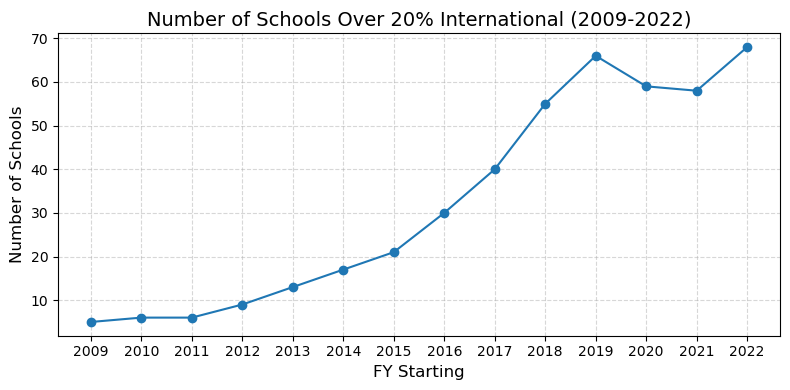

In [147]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the number of schools for each year
years = list(range(2009, 2023))  # List of years from 2009 to 2022
schools_passing = []

# Loop through each year and calculate the number of schools that passed 20% international enrolment
for year in years:
    passed_count = combined_df[
        (combined_df['FY Start'] == year) &
        (combined_df['% International'] > 20) &
        (combined_df['Francophone'] == 0) &
        (~combined_df['School Name'].str.contains("Total|Average"))
    ].shape[0]
    schools_passing.append(passed_count)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(years, schools_passing, marker='o', linestyle='-')
plt.title('Number of Schools Over 20% International (2009-2022)', fontsize=14)
plt.xlabel('FY Starting', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.tight_layout()
plt.show()

In [ ]:
# The pre-Covid peak was 2019. How many schools?
combined_df[
    (combined_df['FY Start'] == 2019) &
    (combined_df['% International'] > 20) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
].shape

(66, 7)

As you can see, 2021 is actually a two-year low from **the peak in 2019, where 66 schools** already had more than 20% international students.

When we looked at raw international student numbers across Canada earlier though, the number of students admitted increased by 20,000 from 2020 to 2021. If we know:

- The number of schools with 20% international enrolment went down slightly from 20/21 to 21/22 and
- Domestic enrolment has virtualy flatlined - but confirm the numbers for 2019-2022 below

Where did the extra 30k international students go? Are they enrolling at schools already above this threshold?

In [182]:
combined_df[
    combined_df['FY Start'].isin([2019, 2020, 2021])
][['International Enrolment', 'Domestic Enrolment']]

International Enrolment  Domestic Enrolment
10                        504                3039
11                        435                2991
12                        390                3123
24                         81                1005
25                         90                 972
...                       ...                 ...
3460                     1896                4734
3461                       12                   9
3462                     1923                4881
3463                       24                   6
3464                     1905                5022

[743 rows x 2 columns]

In [176]:
# confirm the assumption above - total domestic enrolment from 20/21 to 21/22
canada_domestic[
    canada_domestic['FY Start'].isin([2019, 2020, 2021])
][['FY Start', 'Status', 'Enrolment']]



FY Start             Status  Enrolment
10      2019  Canadian students    1349823
11      2020  Canadian students    1357824
12      2021  Canadian students    1347282

In [178]:
# the same code above for international enrolment
canada_data[
    canada_data['FY Start'].isin([2019, 2020, 2021])
][['FY Start', 'Status', 'Enrolment']]


FY Start                  Status  Enrolment
10      2019  International students     340227
11      2020  International students     329334
12      2021  International students     360162

That is confirming that around 1,200 domestic students were lost from AY 20/21 to 21/22, whilst nearly 31,000 international students were gained, whilst less institutions were above 20% international

So where did they go?

In [195]:
# specific provinces change in International Students from 20/21 to 21/22
combined_df['Province/Territory'].unique()

# group international and domestic enrolment by province in the fiscal year 20/21 and 21/21
province_20_to_21 = combined_df[
    combined_df['FY Start'].isin([2019, 2020, 2021]) &
    (combined_df['Francophone'] == 0)
].groupby(['Province/Territory', 'FY Start'])[['International Enrolment', 'Domestic Enrolment']].sum()

province_20_to_21

International Enrolment  \
Province/Territory        FY Start                            
Alberta                   2019                        46728   
                          2020                        45282   
                          2021                        48786   
British Columbia          2019                       108462   
                          2020                        97842   
                          2021                        96504   
Manitoba                  2019                        19236   
                          2020                        18960   
                          2021                        21378   
New Brunswick             2019                         5118   
                          2020                         4608   
                          2021                         5946   
Newfoundland and Labrador 2019                         7458   
                          2020                         7398   
                          2021                         6630   
Nova Scotia               2019                        21852   
                          2020                        20436   
                          2021                        19560   
Ontario                   2019                       341016   
                          2020                       342756   
                          2021                       388290   
Prince Edward Island      2019                         3792   
                          2020                         3846   
                          2021                         3810   
Quebec                    2019                        22812   
                          2020                        21666   
                          2021                        21102   
Saskatchewan              2019                        12252   
                          2020                        11556   
                          2021                        12048   

                                    Domestic Enrolment  
Province/Territory        FY Start                      
Alberta                   2019                  303918  
                          2020                  306222  
                          2021                  309732  
British Columbia          2019                  251394  
                          2020                  252888  
                          2021                  250854  
Manitoba                  2019                   80730  
                          2020                   78870  
                          2021                   78762  
New Brunswick             2019                   28182  
                          2020                   27162  
                          2021                   27300  
Newfoundland and Labrador 2019                   32064  
                          2020                   32142  
                          2021                   32868  
Nova Scotia               2019                   70230  
                          2020                   70410  
                          2021                   75648  
Ontario                   2019                 1131378  
                          2020                 1124508  
                          2021                 1110798  
Prince Edward Island      2019                    9468  
                          2020                    9762  
                          2021                   10044  
Quebec                    2019                   43878  
                          2020                   45234  
                          2021                   45876  
Saskatchewan              2019                   71736  
                          2020                   71448  
                          2021                   71400

In the above, running down the list you can see for 20/21 to 21/22:
- Alberta added 3.5k International students
- BC slipped 1,300, so did NB 
    - BC was noticeably the biggest hit in international enrolment from 19/20 to 20/21, losing over 10,000 students
- Manitoba added 3,000
- NL dropped a few hundred, as did QC and SK
- NS lost 1,000
- Ontario added 45,000
- PEI was steady

The numbers don't appear to line up with a net gain of 31k, Ontario alone added 14k more, but these figures aren't in conflict with the number of institutions over 20% slightly decreasing from FY 20/21 to 21/22. The only way this makes sense is that the schools already past this threshold were the ones adding more enrolment during the pandemic.

Let's check the 2021 schools over 20% and where they were in 2019 - were they below the threshold still accelerating, or were they already there but stalled by covid?

In [192]:
# Step 1: Identify the schools that were above the 20% Int'l in 2021
schools_above_20_in_2021 = combined_df[(combined_df['FY Start'] == 2021) & (combined_df['% International'] > 20) & (combined_df['Francophone'] == 0) & (~combined_df['School Name'].str.contains("Total|Average"))
]['School Name'].unique()

# Step 2: Retrieve the 2021 Percentages for these schools
percentages_2021 = combined_df[(combined_df['FY Start'] == 2021) & (combined_df['School Name'].isin(schools_above_20_in_2021))
][['School Name', '% International']].rename(columns={'% International': '% Intl 2021'})

# Step 3: Retrieve the 2019 percentages for the same schools
percentages_2019 = combined_df[(combined_df['FY Start'] == 2019) & (combined_df['School Name'].isin(schools_above_20_in_2021))
][['School Name', '% International']].rename(columns={'% International': '% Intl 2019'})

# Step 4: Merge the 2019 and 2021 percentages to calculate the change
percent_change = pd.merge(percentages_2019, percentages_2021, on='School Name', how='inner')
percent_change['Change in %'] = percent_change['% Intl 2021'] - percent_change['% Intl 2019']

# Display the result
percent_change.sort_values(by='Change in %', ascending=False)

School Name  % Intl 2019  % Intl 2021  \
5                           Canadore College        38.57        74.77   
26                          Loyalist College        36.84        69.23   
41                             Sault College        26.85        58.26   
46                         St. Clair College        20.40        47.42   
23           Kwantlen Polytechnic University        32.26        44.73   
24                           Lambton College        72.53        84.70   
0                          Algoma University        56.61        68.06   
56               Vancouver Community College        40.87        50.52   
9                     Coast Mountain College        47.23        56.22   
43                            Seneca College        37.10        45.28   
11                         Conestoga College        49.38        56.32   
31                    Niagara College Canada        33.78        40.50   
47                      St. Lawrence College        41.99        48.34   
4                           Cambrian College        52.51        58.81   
32                          NorQuest College        18.95        23.46   
36                           OCAD University        24.07        28.11   
15   Emily Carr University of Art and Design        29.84        33.33   
53                     University of Toronto        25.62        28.92   
55                     University of Windsor        23.29        26.21   
30           New Brunswick Community College        20.67        23.57   
35                   Northern Lights College        52.72        55.56   
19                          Georgian College        32.16        34.84   
51  University of Ottawa-Université d'Ottawa        19.60        21.77   
18                      George Brown College        25.50        27.52   
50                    University of Manitoba        21.33        23.24   
16                          Fanshawe College        32.52        34.17   
38             Red River College Polytechnic        26.08        27.65   
21               Humber College North Campus        24.43        25.90   
52        University of Prince Edward Island        29.22        30.39   
28            Mount Saint Vincent University        23.40        24.30   
57                           York University        19.30        20.03   
25                           Langara College        47.18        47.80   
3                          Burman University        20.41        20.72   
1              Assiniboine Community College        22.78        22.89   
49            University of British Columbia        28.38        27.90   
12                     Confederation College        23.49        22.91   
54                    University of Waterloo        23.13        22.51   
45                   Simon Fraser University        22.85        22.01   
2                         Bow Valley College        24.88        23.15   
13                      Dalhousie University        25.17        23.44   
27                         McGill University        34.21        31.51   
34                          Northern College        78.92        76.02   
42                           Selkirk College        44.85        41.76   
40                   Saint Mary's University        34.59        31.49   
22     Justice Institute of British Columbia        35.67        32.44   
14                           Douglas College        37.92        34.54   
48                Thompson Rivers University        42.14        38.63   
44  Sheridan College Institute of Technology        32.83        27.39   
17                           Fleming College        30.25        24.34   
20                           Holland College        27.50        20.99   
29                          NSCAD University        28.92        21.59   
8                         Centennial College        51.53        43.75   
37                          Okanagan College        31.78        22.55   
7                        Capilano Uni

In [193]:
print(f"Of the 58 schools over 20% in 2021, {percent_change[percent_change['% Intl 2019'] > 20].shape[0]} were already over in 2019")
print(f"Of the 58 schools over 20% in 2021, {percent_change[percent_change['% Intl 2019'] > 33].shape[0]} were already over 33% in 2019")
print(f"Of the 58 schools over 20% in 2021, {percent_change[percent_change['% Intl 2019'] > 50].shape[0]} were already over 50% in 2019")

Of the 58 schools over 20% in 2021, 55 were already over in 2019
Of the 58 schools over 20% in 2021, 26 were already over 33% in 2019
Of the 58 schools over 20% in 2021, 8 were already over 50% in 2019


**The picture emerging is that the schools that had leaned into international the most by 2021 had already done so by 2019.** COVID-19 either substantially reversed that large increase between 2011 and 2019, or they punched straight through it, presumably by online offerings in the interim.

Below we look at the schools that held steady in composition during the COVID pandemic:

In [209]:
# Schools that did not swing by more than 5 percent
steady_schools = percent_change[
    (percent_change['Change in %'] >= -10) &
    (percent_change['Change in %'] <= 10)
]
steady_schools.shape

(47, 4)

In [210]:
# Schools that increased, or decreased by more than 5 percent between 2019 and 2021
swing_schools = percent_change[
    (percent_change['Change in %'] < -10) |
    (percent_change['Change in %'] > 10)
]

print(swing_schools.shape)
swing_schools.sort_values(by='Change in %', ascending=False)

(11, 4)


School Name  % Intl 2019  % Intl 2021  Change in %
5                  Canadore College        38.57        74.77        36.20
26                 Loyalist College        36.84        69.23        32.39
41                    Sault College        26.85        58.26        31.41
46                St. Clair College        20.40        47.42        27.02
23  Kwantlen Polytechnic University        32.26        44.73        12.47
24                  Lambton College        72.53        84.70        12.17
0                 Algoma University        56.61        68.06        11.45
39           Royal Roads University        45.31        33.82       -11.49
6            Cape Breton University        61.99        49.05       -12.94
33             North Island College        35.29        21.64       -13.65
10         College of New Caledonia        56.54        39.50       -17.04

In the schools that shifted more than 10% in international composition during the pandemic, up or down, more schools shifted up than shifted down, despite the difficulties in travel and study restrictions during this period.

It's noticeable that the up swingers are generally in Ontario whilst the down swing is more in BC, possibly reflecting different provincial public health policies in addition to the postsecondary institutions individual operations

The overall conclusion of the COVID pandemic (particularly 20/21 and partially 21/22 AY) is that the schools which changed their International/Domestic ratio most significantly were most significantly changed during this period, whether they continued to ramp up international enrollment significantly or that it declined most significantly, as in 4 of the 5 hardest declines fro 2019-2021 were over half international in 2019.

And as we examine these schools, a reminder all the other PSIs in the Canadian ecosystem are still below one in five in 2021.

I will add the A/Y 2022-23 to this data soon to see changes

### Some small schools **exploded** into international growth

I used a 20% international student ratio as a marker of schools that serve a significant international student populace relative to their size. 

Six schools were there in 2011, 57 were there in 2021 as discussed above, but a lot of schools went well beyond the one in five 'lower boundary'. 

Below we can see 28 of those went above 33% International

In [302]:
# Half of the schools over 20% international in 2021 were already over 33%
combined_df[
    (combined_df['FY Start'] == 2021) &
    (combined_df['% International'] > 33) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
].shape

(28, 7)

Is there a pattern to where these schools are? Let's look at 2022, the most recent data. 

In [316]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with two columns for the pie charts
fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],  # Specify the type as 'domain' for pie charts
    subplot_titles=(
        'Location of Anglophone Canadian PSIs over 20% international, 2022',
        'Location of Anglophone Canadian PSIs over 33% international, 2022'
    )
)

# Filter the data for the first pie chart
data_25 = combined_df[
    (combined_df['FY Start'] == 2022) &
    (combined_df['% International'] > 20) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]

# Filter the data for the second pie chart
data_50 = combined_df[
    (combined_df['FY Start'] == 2022) &
    (combined_df['% International'] > 33) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]

# Add the first pie chart to the subplot
fig.add_trace(
    go.Pie(
        labels=data_25['Province/Territory'],
        title='>20% Int\'l',
        textinfo='percent+label',
        hole=0.3  # Optional: make it a donut chart
    ),
    row=1, col=1
)

# Add the second pie chart to the subplot
fig.add_trace(
    go.Pie(
        labels=data_50['Province/Territory'],
        title='>33% Int\'l',
        textinfo='percent+label',
        hole=0.3  # Optional: make it a donut chart
    ),
    row=1, col=2
)

# Update the layout of the figure
fig.update_layout(
    template='plotly_dark'
)

# Show the figure
fig.show()

In [310]:
combined_df[(combined_df['FY Start'] == 2022) & (combined_df['% International'] > 33) & (~combined_df['School Name'].str.contains("Total|Average")) & (combined_df['Francophone'] == 0)]

School Name Province/Territory  FY Start  \
41                           Algoma University            Ontario      2022   
83               Assiniboine Community College           Manitoba      2022   
220                           Cambrian College            Ontario      2022   
276                           Canadore College            Ontario      2022   
290                     Cape Breton University        Nova Scotia      2022   
304                        Capilano University   British Columbia      2022   
346                         Centennial College            Ontario      2022   
374                     Coast Mountain College   British Columbia      2022   
388                   College of New Caledonia   British Columbia      2022   
785                          Conestoga College            Ontario      2022   
799                      Confederation College            Ontario      2022   
1478                           Douglas College   British Columbia      2022   
1506   Emily Carr University of Art and Design   British Columbia      2022   
1520                          Fanshawe College            Ontario      2022   
1534                           Fleming College            Ontario      2022   
1548                      George Brown College            Ontario      2022   
1562                          Georgian College            Ontario      2022   
1618               Humber College North Campus            Ontario      2022   
1674     Justice Institute of British Columbia   British Columbia      2022   
1707           Kwantlen Polytechnic University   British Columbia      2022   
1777                           Lambton College            Ontario      2022   
1791                           Langara College   British Columbia      2022   
1833                          Loyalist College            Ontario      2022   
2042                    Niagara College Canada            Ontario      2022   
2128                          Northern College            Ontario      2022   
2156                   Northern Lights College   British Columbia      2022   
2424                             Sault College            Ontario      2022   
2438                           Selkirk College   British Columbia      2022   
2452                            Seneca College            Ontario      2022   
2466  Sheridan College Institute of Technology            Ontario      2022   
2522                         St. Clair College            Ontario      2022   
2550                      St. Lawrence College            Ontario      2022   
2632                Thompson Rivers University   British Columbia      2022   
3126               Vancouver Community College   British Columbia      2022   

      Domestic Enrolment  International Enrolment  Francophone  \
41                   741                     2562            0   
83                  1176                      684            0   
220                 2601                     4803            0   
276                 1782                     4956            0   
290                 1428                     3330            0   
304                 3213                     2082            0   
346                 8298                    11559            0   
374                  246                      387            0   
388                 1095                      825            0   
785                 7788                    14292            0   
799                 1866                      945            0   
1478                6087                     3534            0   
1506                1248                      669            0   
1520               10386                     8172            0   
1534                2769                     2019            0   
1548               10821                     5391            0   
1562                5154                     7584            0   
1618               14733                     7584            0   
1674           

How extensive has the transition been in some schools?

Below are the schools **over 50% international**.

In [313]:
# schools with >1.0 int/dom ratio in 2022
combined_df[
    (combined_df['FY Start'] == 2022) &
    (combined_df['% International'] > 50) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]

School Name Province/Territory  FY Start  \
41                  Algoma University            Ontario      2022   
220                  Cambrian College            Ontario      2022   
276                  Canadore College            Ontario      2022   
290            Cape Breton University        Nova Scotia      2022   
346                Centennial College            Ontario      2022   
374            Coast Mountain College   British Columbia      2022   
785                 Conestoga College            Ontario      2022   
1562                 Georgian College            Ontario      2022   
1707  Kwantlen Polytechnic University   British Columbia      2022   
1777                  Lambton College            Ontario      2022   
1791                  Langara College   British Columbia      2022   
1833                 Loyalist College            Ontario      2022   
2042           Niagara College Canada            Ontario      2022   
2128                 Northern College            Ontario      2022   
2156          Northern Lights College   British Columbia      2022   
2424                    Sault College            Ontario      2022   
2452                   Seneca College            Ontario      2022   
2550             St. Lawrence College            Ontario      2022   
3126      Vancouver Community College   British Columbia      2022   

      Domestic Enrolment  International Enrolment  Francophone  \
41                   741                     2562            0   
220                 2601                     4803            0   
276                 1782                     4956            0   
290                 1428                     3330            0   
346                 8298                    11559            0   
374                  246                      387            0   
785                 7788                    14292            0   
1562                5154                     7584            0   
1707                5586                     5703            0   
1777                1794                    11736            0   
1791                3927                     4338            0   
1833                1602                     5049            0   
2042                4803                     8523            0   
2128                1119                     4164            0   
2156                 360                      540            0   
2424                1152                     2463            0   
2452               11298                    11346            0   
2550                4032                     6504            0   
3126                1041                     1404            0   

      % International  
41              77.57  
220             64.87  
276             73.55  
290             69.99  
346             58.21  
374             61.14  
785             64.73  
1562            59.54  
1707            50.52  
1777            86.74  
1791            52.49  
1833            75.91  
2042            63.96  
2128            78.82  
2156            60.00  
2424            68.13  
2452            50.11  
2550            61.73  
3126            57.42

These schools over 50% now have the majority of their operations for international students. There are a few things that make these schools noticeable:

- They are usually small colleges with enrolment in the 1,000-3,000 domestic mark that have enrolled that number or multiple times that number in international students in this ten year period. They **rapidly transformed** into predominantly international service providers.
- None of the original >20% ratio schools in 2011 are in this list.

For the most part, they started 2011 as small institutions that had next to no international student representation. In the period from 2011-2022 most of them declined domestically as they grew internationally.

In [314]:
# look at the schools with over 50% in 2022 but in 2011
over_half_schools = combined_df[
    (combined_df['FY Start'] == 2022) &
    (combined_df['% International'] > 50) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]['School Name'].unique()

# Filter the data for these schools in 2011
combined_df[
    (combined_df['FY Start'] == 2011) &
    (combined_df['School Name'].isin(over_half_schools))
]

School Name Province/Territory  FY Start  \
30                  Algoma University            Ontario      2011   
209                  Cambrian College            Ontario      2011   
265                  Canadore College            Ontario      2011   
279            Cape Breton University        Nova Scotia      2011   
335                Centennial College            Ontario      2011   
363            Coast Mountain College   British Columbia      2011   
774                 Conestoga College            Ontario      2011   
1551                 Georgian College            Ontario      2011   
1696  Kwantlen Polytechnic University   British Columbia      2011   
1766                  Lambton College            Ontario      2011   
1780                  Langara College   British Columbia      2011   
1822                 Loyalist College            Ontario      2011   
2031           Niagara College Canada            Ontario      2011   
2117                 Northern College            Ontario      2011   
2145          Northern Lights College   British Columbia      2011   
2413                    Sault College            Ontario      2011   
2441                   Seneca College            Ontario      2011   
2539             St. Lawrence College            Ontario      2011   
3115      Vancouver Community College   British Columbia      2011   

      Domestic Enrolment  International Enrolment  Francophone  \
30                   819                       72            0   
209                 4194                       78            0   
265                 1287                      129            0   
279                 1899                      597            0   
335                 9651                     3375            0   
363                  642                        0            0   
774                 8886                      633            0   
1551                7362                      234            0   
1696                8220                      867            0   
1766                6858                      186            0   
1780                5697                      462            0   
1822                3108                       27            0   
2031                7248                      795            0   
2117                1308                        3            0   
2145                 411                       21            0   
2413                2346                        3            0   
2441               16761                      165            0   
2539                7206                      447            0   
3115                1536                      120            0   

      % International  
30               8.08  
209              1.83  
265              9.11  
279             23.92  
335             25.91  
363              0.00  
774              6.65  
1551             3.08  
1696             9.54  
1766             2.64  
1780             7.50  
1822             0.86  
2031             9.88  
2117             0.23  
2145             4.86  
2413             0.13  
2441             0.97  
2539             5.84  
3115             7.25

It is true that the smaller schools recruiting international students will have this ratio change more dramatically - TBC



#### Different provinces had different numbers of **'transformers'**

These are **initially small institutions in 2011 which had their international student % massively change in this 2011-2022 period.** They are distinct from:
- Schools which already began the period with a significant international student representation such as Centennial College, or 
- Those that added a lot of international students alongside a large domestic base like Seneca, Centennial, George Brown or York University. 

With domestic enrolment flatlined almost everywhere in Canada, it's not unreasonable that these previously small regional schools that have rapidly grown to multiples of their original size almost entirely off of international students. These schools are threatened the most with any restrictions to the flow of international students, as they cannot even rely on a sizeable domestic student populace to serve and receive funding.

**Ontario has the most explosive transformers** - Lambton College, Northern College, Canadore College, Algoma University, Cambrian College, Loyalist College and Conestoga College all began the period with at most 10% international student enrolment. With the exception of Conestoga College at 8000 domestic students, these were small sub-5000 student schools with 2011 international student numbers often in the hundreds. 

All of these schools entered 2021-22 with international students making at least the majorty of their student body, often multiple times the domestic count, like Lambton College which was around 85% international in 2021, and Algoma, Loyalist, Canadore and Northern College all above 67%.

- **Lambton College has strange data in 11-12 and 12-13 where Domestic enrolment then drops off a cliff for 13-14. I will check the MCU (provincial body) data for clarity, as it's more granular, but I suspect their domestic enrolment is around the 2-3k mark in 2011-2013.**
    
- **Cambrian College also had some early data in the MCU repository clouded by the 'Other' Category.**

**BC's transformers were not nearly as explosive as those in Ontario**. No BC institution passed 60% international by 2021 which was a lower boundary for the explosive growers in Ontario. In BC, Coast Mountain College (CMC), Northern Lights College, Langara College, College of New Caledonia (CNC) Kwantlen Polytechnic University (KPU), Vancouver Community College (VCC) and Selkirk College grew the highest share of international students in their makeup, all starting 2011 with < 10% international and all touched or exceeded 40% at some point in the most recent 3-4 years of the reference period. Some have peaked and dropped off like CNC, but it may be COVID related in 2020-2021.

- If we are trying to identify transformers as *small* schools that effectively changed their principal market from domestic to international, a *small school* is going to be smaller in BC than in ON by virtue of ON being nearly 3x the population. 
    - Langara began 2011 with 5,700 domestic students, KPU with 8,200 and this puts them in the category of  where the others were around 2,000 or below. Langara and KPU have both effectively become equal domestic and international students, closing a gap of 5.5-8k students.

    - Coast Mountain College and Northern Lights College are both sub-1000 domestic enrolment in 2011 so their ratios are going to be more sensitive to raw numbers.

Transformers were often but not always colleges - Cape Breton University, Algoma University and Kwantlen Polytechnic University all rapidly grew in international students with a small domestic base.

## Impact on Revenue - Tuition fees of schools, assuming declines in international enrolment due to IRCC changes

From Statistics Canada: 
- [Canadian and international tuition fees by level of study (current dollars)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710004501)

I did some spot checking and it does appear that undergraduate annual tuition fees are greater than (post)graduate, which I was surprised by.

This section will import the tuition fees table for 2023/24, as well as the number of graduate and undergraduate enrolments by international/domestic status. 

Since it was the 2023/2024 FY that the IRCC changes were announced (January 2024) this would be the most accurate point to project losses for postsecondary institutions, beginning with declines in enrolment for September 2024 and onwards, given further updates have occurred throughout 2024.

In a later version we may be able to see by number of permits issued specifically (when the data are available), but for now we will estimate based on hypothetical scenarios e.g. a blanket 15% or 25% decline for all institutions.

In [287]:
# open the csv file
tuition = pd.read_csv('/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/23-24_fees.csv')

In [288]:
tuition.drop(columns=['DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], inplace=True)
tuition

REF_DATE                        GEO               Level of study    VALUE
0   2023/2024                     Canada       Canadian undergraduate   7152.0
1   2023/2024                     Canada            Canadian graduate   7542.0
2   2023/2024                     Canada  International undergraduate  38251.0
3   2023/2024                     Canada       International graduate  22114.0
4   2023/2024  Newfoundland and Labrador       Canadian undergraduate   3593.0
5   2023/2024  Newfoundland and Labrador            Canadian graduate   3435.0
6   2023/2024  Newfoundland and Labrador  International undergraduate  17515.0
7   2023/2024  Newfoundland and Labrador       International graduate   4833.0
8   2023/2024       Prince Edward Island       Canadian undergraduate   7359.0
9   2023/2024       Prince Edward Island            Canadian graduate   5750.0
10  2023/2024       Prince Edward Island  International undergraduate  19128.0
11  2023/2024       Prince Edward Island       International graduate  11513.0
12  2023/2024                Nova Scotia       Canadian undergraduate   9551.0
13  2023/2024                Nova Scotia            Canadian graduate  10479.0
14  2023/2024                Nova Scotia  International undergraduate  25885.0
15  2023/2024                Nova Scotia       International graduate  22501.0
16  2023/2024              New Brunswick       Canadian undergraduate   8701.0
17  2023/2024              New Brunswick            Canadian graduate   7774.0
18  2023/2024              New Brunswick  International undergraduate  17728.0
19  2023/2024              New Brunswick       International graduate  16398.0
20  2023/2024                     Quebec       Canadian undergraduate   3489.0
21  2023/2024                     Quebec            Canadian graduate   3760.0
22  2023/2024                     Quebec  International undergraduate  32319.0
23  2023/2024                     Quebec       International graduate  21115.0
24  2023/2024                    Ontario       Canadian undergraduate   8271.0
25  2023/2024                    Ontario            Canadian graduate   9522.0
26  2023/2024                    Ontario  International undergraduate  46297.0
27  2023/2024                    Ontario       International graduate  27010.0
28  2023/2024                   Manitoba       Canadian undergraduate   5390.0
29  2023/2024                   Manitoba            Canadian graduate   5775.0
30  2023/2024                   Manitoba  International undergraduate  18928.0
31  2023/2024                   Manitoba       International graduate  12730.0
32  2023/2024               Saskatchewan       Canadian undergraduate   9240.0
33  2023/2024               Saskatchewan            Canadian graduate   5217.0
34  2023/2024               Saskatchewan  International undergraduate  28090.0
35  2023/2024               Saskatchewan       International graduate   9280.0
36  2023/2024                    Alberta       Canadian undergraduate   7561.0
37  2023/2024                    Alberta            Canadian graduate   6489.0
38  2023/2024                    Alberta  International undergraduate  31498.0
39  2023/2024                    Alberta       International graduate  15302.0
40  2023/2024           British Columbia       Canadian undergraduate   6477.0
41  2023/2024           British Columbia            Canadian graduate  10803.0
42  2023/2024           British Columbia  International undergraduate  35469.0
43  2023/2024           British Columbia       International graduate  24139.0
44  2023/2024                      Yukon       Canadian undergraduate   4275.0
45  2023/2024                      Yukon            Canadian graduate      NaN
46  2023/2024                      Yukon  International undergraduate      NaN
47  2023/2024                      Yukon       International graduate      NaN

Adding enrolment by program types and international/domestic students from StatCan - [enrolment by program type and status of student in Canada](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3710027701). 

**Important notes**

- Classification of program types [is here](https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=1252482&CVD=1252483&CLV=0&MLV=2&D=1). 
    - **Graduate (second cycle) means Master's programs**
    - **Graduate (third cycle) is PhD**

- **I'm using 2022-2023 enrolment data, and 2023/2024 tuition fee figures - latest available from StatCan**. We will use 2023-24 tuition fees, and enrolment from 22-23 with hypothetical declines in student enrolment due to IRCC changes made January 2024 to estimate revenue changes into the future.

- The easiest distinction is at Program Type, between undergraduate and graduate degrees for their tuition fee costs. However, you need to look at Credential Type for certificates and diplomas (popular at the colleges)
- There is inconsistency in where graduate diplomas/certificates sit in 'program type'.
    - For example there are 509,000 Credential type: Diploma students across all of Canada in 22/23 and 386k of them are in 'Career, Technical or Professional Training Program' Program Type. 85k of these are sitting under 'Pre-University Program' (of 87k total in the Pre-uni category) which makes me think there are PSIs classifying a High School diploma, which wouldn't impact tuition fees. The remaining 55k are scattered across various other program types
    - Certificate credentials are clearer - of 190k in Canada, almost all are captured in the 'Career, Technical or Professional Training Program', 'Post Career, Technical or Professional Training Program' or Undergraduate.
- I only imported the student enrolment from full programs - there were around 100,000 enrolments (out of 2.2m total enrolments in all programs) in 'non-program' some were non credit, some undergraduate, some graduate, I assume this meant students taking individual classes to complete programs at a later date, and not an end-to-end program enrolment on a schedule.
- The above analysis was done on full-time and part time students. As with my analysis earlier, I am only taking full-time PSI student data (a total of 1.7m in Canada)


All this is to say the calculations here will be estimates at best, with the heavy lifting being done by the difference between domestic and international tuition fees mostly at the undergraduate and graduate degree level, as these are the most numerous and require somewhat less granularity than fees for certificates/diplomas.

In [331]:
# import the csv file
enrolment = pd.read_csv('/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/statcan-program-int-can-enrolment.csv')

In [332]:
enrolment

REF_DATE                              GEO        DGUID  \
0     2022/2023        Newfoundland and Labrador  2021A000210   
1     2022/2023        Newfoundland and Labrador  2021A000210   
2     2022/2023        Newfoundland and Labrador  2021A000210   
3     2022/2023        Newfoundland and Labrador  2021A000210   
4     2022/2023        Newfoundland and Labrador  2021A000210   
...         ...                              ...          ...   
5017  2022/2023  Nunavut Arctic College, Nunavut          NaN   
5018  2022/2023  Nunavut Arctic College, Nunavut          NaN   
5019  2022/2023  Nunavut Arctic College, Nunavut          NaN   
5020  2022/2023  Nunavut Arctic College, Nunavut          NaN   
5021  2022/2023  Nunavut Arctic College, Nunavut          NaN   

             Field of study  \
0     Total, field of study   
1     Total, field of study   
2     Total, field of study   
3     Total, field of study   
4     Total, field of study   
...                     ...   
5017  Total, field of study   
5018  Total, field of study   
5019  Total, field of study   
5020  Total, field of study   
5021  Total, field of study   

                                           Program type  \
0                                   Total, program type   
1                                   Total, program type   
2                                   Total, program type   
3                                   Total, program type   
4                                   Total, program type   
...                                                 ...   
5017  Career, technical or professional training pro...   
5018  Career, technical or professional training pro...   
5019  Career, technical or professional training pro...   
5020                              Undergraduate program   
5021                              Undergraduate program   

                       Credential type          Institution type  \
0               Total, credential type  Total, institution type    
1               Total, credential type  Total, institution type    
2                          Certificate  Total, institution type    
3                          Certificate  Total, institution type    
4                              Diploma  Total, institution type    
...                                ...                       ...   
5017                       Certificate  Total, institution type    
5018                           Diploma  Total, institution type    
5019   Not applicable, credential type  Total, institution type    
5020            Total, credential type  Total, institution type    
5021  Degree (includes applied degree)  Total, institution type    

     Registration status Status of student in Canada         Gender  ...  \
0      Full-time student           Canadian students  Total, gender  ...   
1      Full-time student      International students  Total, gender  ...   
2      Full-time student           Canadian students  Total, gender  ...   
3      Full-time student      International students  Total, gender  ...   
4      Full-time student           Canadian students  Total, gender  ...   
...                  ...                         ...            ...  ...   
5017   Full-time student           Canadian students  Total, gender  ...   
5018   Full-time student           Canadian students  Total, gender  ...   
5019   Full-time student           Canadian students  Total, gender  ...   
5020   Full-time student           Canadian students  Total, gender  ...   
5021   Full-time student           Canadian students  Total, gender  ...   

     UOM_ID  SCALAR_FACTOR SCALAR_ID       VECTOR         COORDINATE  VALUE  \
0       223          units         0  v1608688340    2.1.1.1.1.2.2.1  15288   
1       223          units         0  v1608688344    2.1.1.1.1.2.3.1   4725   
2       223          units         0  v1608688462    2.1.1.3.1.2.2.1   1350   
3       223          units         0  v1608688466    2.1.1.3.1.2.3.1     42   
4       223        

### Cleaning of program-type enrolment

There is a lot of cleaning of the dataframe and I need to ensure the estimates of students in Undergrad / graduate programs with Domestic / international students at least line up approximately to make the revenue predictions

In [333]:
# check registration status is all Full-time student
enrolment['Registration status'].unique()

array(['Full-time student'], dtype=object)

In [334]:
# clean up a lot of columns
enrolment.drop(columns=['DGUID', 'Field of study', 'Registration status', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], inplace=True)

In [335]:
enrolment

REF_DATE                              GEO  \
0     2022/2023        Newfoundland and Labrador   
1     2022/2023        Newfoundland and Labrador   
2     2022/2023        Newfoundland and Labrador   
3     2022/2023        Newfoundland and Labrador   
4     2022/2023        Newfoundland and Labrador   
...         ...                              ...   
5017  2022/2023  Nunavut Arctic College, Nunavut   
5018  2022/2023  Nunavut Arctic College, Nunavut   
5019  2022/2023  Nunavut Arctic College, Nunavut   
5020  2022/2023  Nunavut Arctic College, Nunavut   
5021  2022/2023  Nunavut Arctic College, Nunavut   

                                           Program type  \
0                                   Total, program type   
1                                   Total, program type   
2                                   Total, program type   
3                                   Total, program type   
4                                   Total, program type   
...                                                 ...   
5017  Career, technical or professional training pro...   
5018  Career, technical or professional training pro...   
5019  Career, technical or professional training pro...   
5020                              Undergraduate program   
5021                              Undergraduate program   

                       Credential type Status of student in Canada  VALUE  
0               Total, credential type           Canadian students  15288  
1               Total, credential type      International students   4725  
2                          Certificate           Canadian students   1350  
3                          Certificate      International students     42  
4                              Diploma           Canadian students   2895  
...                                ...                         ...    ...  
5017                       Certificate           Canadian students    312  
5018                           Diploma           Canadian students    294  
5019   Not applicable, credential type           Canadian students    123  
5020            Total, credential type           Canadian students     15  
5021  Degree (includes applied degree)           Canadian students     15  

[5022 rows x 6 columns]

In [336]:
enrolment['Program type'].unique()

array(['Total, program type',
       'Career, technical or professional training program',
       'Post career, technical or professional training program',
       'Undergraduate program', 'Post-baccalaureate non-graduate program',
       'Graduate program (second cycle)',
       'Graduate program (third cycle)', 'Pre-university program'],
      dtype=object)

Cleaning & Processing still to do:
- Rename columns for clarity

- Nunavut/Yukon/NW Territories can be dropped

- Change Year entry to be consistent with previous, e.g. FY Start: 2022 rather than Year: 2022/2023

- Clean Institution name to Insitution and set Province in another category: e.g. York University rather than York University, Ontario

- Data Audit - do total enrolments in this data match up with the international / domestic data we have from earlier? It's the same student populations, they should be quite similar (some difference, because I have left out some less significant programs in the `enrolment` df)

- Some assumptions to be made regarding certificate/diploma being graduate or undergraduate programs

In [ ]:
# Renaming columns for clarity
enrolment.rename(columns={
    'REF_DATE': 'FY Start',
    'GEO': 'Institution',
    'VALUE': 'Enrolment',
    'Status of student in Canada': 'Student Status'
}, inplace=True)

In [ ]:
# check Yukon, Nunavut and Northwest Territories in the data to be dropped - confirm the small numbers we did not look at earlier

# create a list of territories to exclude
territories = ["Yukon", "Northwest Territories", "Nunavut"]

# drop the territories from Institution
enrolment = enrolment[~enrolment['Institution'].isin(territories)]

# drop the institutions in these territories by regex match after the comma in Institution
enrolment = enrolment[~enrolment['Institution'].str.contains("Yukon|Northwest Territories|Nunavut")]

In [ ]:
# spot check that Nunavut was removed
enrolment[enrolment['Institution'].str.contains("Nunavut")]

Empty DataFrame
Columns: [FY Start, Institution, Program type, Credential type, Student Status, Enrolment]
Index: []

In [358]:
# create a province column after institution column, split on comma
enrolment['Province/Territory'] = enrolment['Institution'].str.split(',').str[1].str.strip()

# insert Province/Territory column after Institution
enrolment = enrolment[['FY Start', 'Institution', 'Province/Territory', 'Student Status', 'Program type', 'Credential type', 'Enrolment']]

# string replace Institution, remove comma and everything after
enrolment['Institution'] = enrolment['Institution'].str.replace(r',.*', '', regex=True)

In [366]:
# Change FY Start from 2022/2023 to 2022
enrolment['FY Start'] = enrolment['FY Start'].str.split('/').str[0]

In [367]:
enrolment

FY Start                      Institution Province/Territory  \
0        2022        Newfoundland and Labrador                NaN   
1        2022        Newfoundland and Labrador                NaN   
2        2022        Newfoundland and Labrador                NaN   
3        2022        Newfoundland and Labrador                NaN   
4        2022        Newfoundland and Labrador                NaN   
...       ...                              ...                ...   
4965     2022  University of the Fraser Valley   British Columbia   
4966     2022  University of the Fraser Valley   British Columbia   
4967     2022  University of the Fraser Valley   British Columbia   
4968     2022  University of the Fraser Valley   British Columbia   
4969     2022  University of the Fraser Valley   British Columbia   

              Student Status                             Program type  \
0          Canadian students                      Total, program type   
1     International students                      Total, program type   
2          Canadian students                      Total, program type   
3     International students                      Total, program type   
4          Canadian students                      Total, program type   
...                      ...                                      ...   
4965  International students                    Undergraduate program   
4966       Canadian students                    Undergraduate program   
4967  International students                    Undergraduate program   
4968  International students  Post-baccalaureate non-graduate program   
4969  International students  Post-baccalaureate non-graduate program   

                       Credential type  Enrolment  
0               Total, credential type      15288  
1               Total, credential type       4725  
2                          Certificate       1350  
3                          Certificate         42  
4                              Diploma       2895  
...                                ...        ...  
4965  Degree (includes applied degree)        729  
4966                  Associate degree         12  
4967                  Associate degree         84  
4968            Total, credential type         21  
4969                       Certificate         21  

[4970 rows x 7 columns]

#### Spot check the enrolment from this new table - couple of examples

In [374]:
# spot check some enrolments - total enrolments against the combined df below
enrolment[(enrolment['Institution'] == 'York University') & (enrolment['Program type'] == 'Total, program type') & (enrolment['Credential type'] == 'Total, credential type')]

FY Start      Institution Province/Territory          Student Status  \
2558     2022  York University            Ontario       Canadian students   
2559     2022  York University            Ontario  International students   

             Program type         Credential type  Enrolment  
2558  Total, program type  Total, credential type      36144  
2559  Total, program type  Total, credential type       8697

In [377]:
combined_df[(combined_df['School Name'] == 'York University') & (combined_df['FY Start'] == 2022)][['School Name', 'Domestic Enrolment', 'International Enrolment']]

School Name  Domestic Enrolment  International Enrolment
3182  York University               36144                     8697

In [378]:
enrolment[(enrolment['Institution'] == 'University of British Columbia') & (enrolment['Program type'] == 'Total, program type') & (enrolment['Credential type'] == 'Total, credential type')]

FY Start                     Institution Province/Territory  \
4246     2022  University of British Columbia   British Columbia   
4247     2022  University of British Columbia   British Columbia   

              Student Status         Program type         Credential type  \
4246       Canadian students  Total, program type  Total, credential type   
4247  International students  Total, program type  Total, credential type   

      Enrolment  
4246      36735  
4247      14472

In [379]:
combined_df[(combined_df['School Name'] == 'University of British Columbia') & (combined_df['FY Start'] == 2022)][['School Name', 'Domestic Enrolment', 'International Enrolment']]

School Name  Domestic Enrolment  \
2716  University of British Columbia               36735   

      International Enrolment  
2716                    14472

### Calculate revenue

## High-level conclusions:

Any relationship to population growth?

## Next Steps